1) All Information is Pulled From: istapwatersafe.com and as the website dynamically changes, the information scrapped from the website will change
2) ASU Igem Python Live Dataset and Code
3) 2022 Summer Demo

In [1]:
import requests #Import Requests Module in Python for Web Scrapping

webpage = requests.get('https://istapwatersafe.com/epa-data/state/AZ/') #Create a webpage object with the website required for sending a http request

Arizona has a total of 14,625 Cases. This chunk of code prints all the contaminants found in Arizona.

In [2]:
from bs4 import BeautifulSoup #import BeatifulSoup Python module for web scrapping
soup = BeautifulSoup(webpage.content, "html.parser") #Use html parser for html structured website and create a soup object

list_of_contaminents = []
contaminents_in_arizona = soup.select('.contaminant-card__title')
for contaminent_in_arizona in contaminents_in_arizona:
    theThingToAdd = contaminent_in_arizona.get_text()
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t\t', '')
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t', '')
    list_of_contaminents.append(theThingToAdd)

print(list_of_contaminents)

with open('list_of_contaminants_in_arizona.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(list_of_contaminents))

['Arsenic', 'Nitrate', 'Coliform (TCR)', 'Fluoride', 'TTHM', 'Radium-228', 'Total Haloacetic Acids (HAA5)', 'Tetrachloroethylene', 'Cadmium', 'Selenium', 'Mercury', 'Thallium, Total', 'Asbestos', 'Di(2-ethylhexyl) phthalate', 'Trichloroethylene', 'Chlorine', 'Antimony, Total']


In [3]:
list_of_contaminents_total = []
contaminents_in_arizona_totals = soup.select('.contaminant-card__count')
for contaminents_in_arizona_total in contaminents_in_arizona_totals: 
    theThingToAdd = contaminents_in_arizona_total.get_text()
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t\t', '')
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t', '')
    theThingToAdd = theThingToAdd.replace(',', '')
    list_of_contaminents_total.append(float(theThingToAdd))

print(list_of_contaminents_total)

[6217.0, 4284.0, 2499.0, 792.0, 441.0, 232.0, 54.0, 32.0, 28.0, 20.0, 8.0, 7.0, 4.0, 2.0, 2.0, 2.0, 1.0]


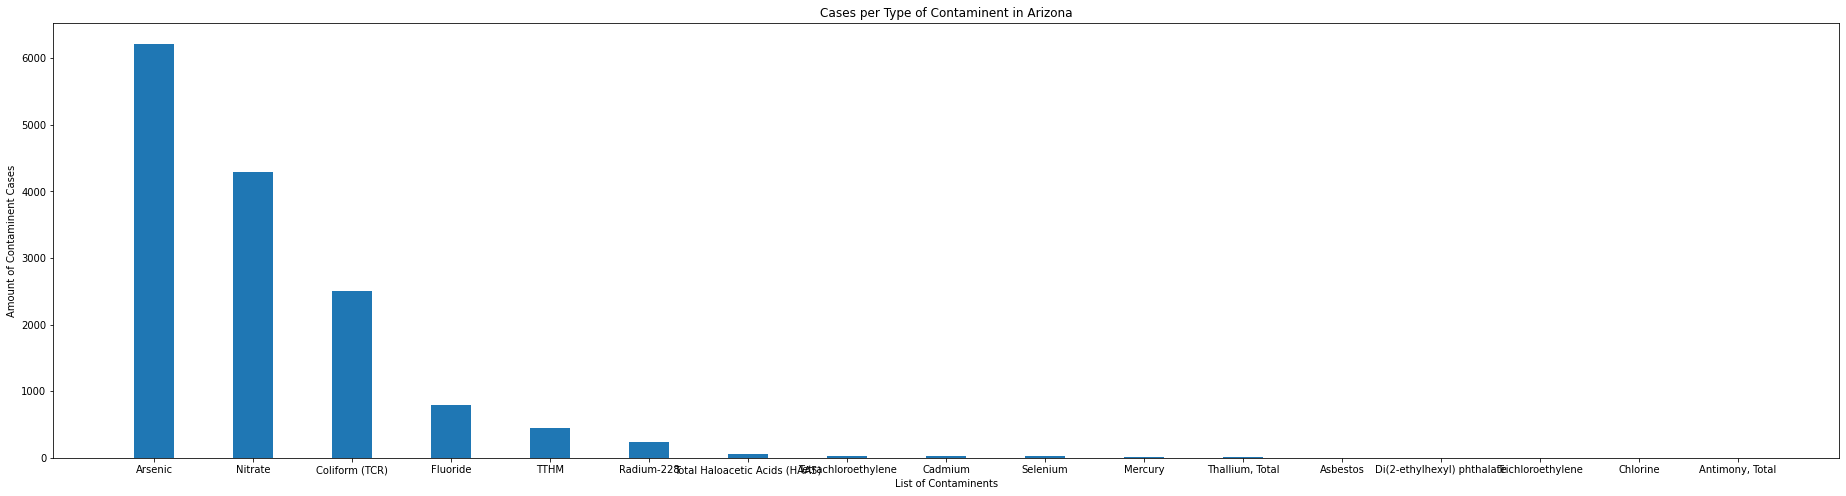

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (32, 8))

plt.bar(list_of_contaminents, list_of_contaminents_total, align='center', width=0.4)
plt.title('Cases per Type of Contaminent in Arizona')
plt.xlabel('List of Contaminents')
plt.ylabel('Amount of Contaminent Cases')
plt.show()

In [5]:
type_of_contaminant_with_numbers = {key:value for key, value in zip(list_of_contaminents, list_of_contaminents_total)}
print(type_of_contaminant_with_numbers)

{'Arsenic': 6217.0, 'Nitrate': 4284.0, 'Coliform (TCR)': 2499.0, 'Fluoride': 792.0, 'TTHM': 441.0, 'Radium-228': 232.0, 'Total Haloacetic Acids (HAA5)': 54.0, 'Tetrachloroethylene': 32.0, 'Cadmium': 28.0, 'Selenium': 20.0, 'Mercury': 8.0, 'Thallium, Total': 7.0, 'Asbestos': 4.0, 'Di(2-ethylhexyl) phthalate': 2.0, 'Trichloroethylene': 2.0, 'Chlorine': 2.0, 'Antimony, Total': 1.0}


[60.0, 15.0, 6.0, 4.0, 428.0, 279.0, 104.0, 1.0, 156.0, 19.0, 45.0, 15.0, 5.0, 342.0, 2.0, 84.0, 729.0, 150.0, 416.0, 6.0, 103.0, 339.0, 1777.0, 25.0, 10.0, 3.0, 35.0, 88.0, 6.0, 47.0, 4.0, 1687.0, 10.0, 534.0]
{'Apache, AZ': 60.0, 'Atlantic, AZ': 15.0, 'Bucks, AZ': 6.0, 'Burleson, AZ': 4.0, 'Cochise, AZ': 428.0, 'Coconino, AZ': 279.0, 'Ector, AZ': 104.0, 'Garfield, AZ': 1.0, 'Gila, AZ': 156.0, 'Graham, AZ': 19.0, 'Greenlee, AZ': 45.0, 'Kane, AZ': 15.0, 'Kerr, AZ': 5.0, 'La Paz, AZ': 342.0, 'Los Angeles, AZ': 2.0, 'Lubbock, AZ': 84.0, 'Maricopa, AZ': 729.0, 'Midland, AZ': 150.0, 'Mohave, AZ': 416.0, 'Montery, AZ': 6.0, 'Navajo, AZ': 103.0, 'Pima, AZ': 339.0, 'Pinal, AZ': 1777.0, 'Polk, AZ': 25.0, 'Randall, AZ': 10.0, 'San Bernardino, AZ': 3.0, 'Sandoval, AZ': 35.0, 'Santa Cruz, AZ': 88.0, 'Shobeygan, AZ': 6.0, 'Shelby, AZ': 47.0, 'Umatilaa, AZ': 4.0, 'Yavapai, AZ': 1687.0, 'York, AZ': 10.0, 'Yuma, AZ': 534.0}
34
34


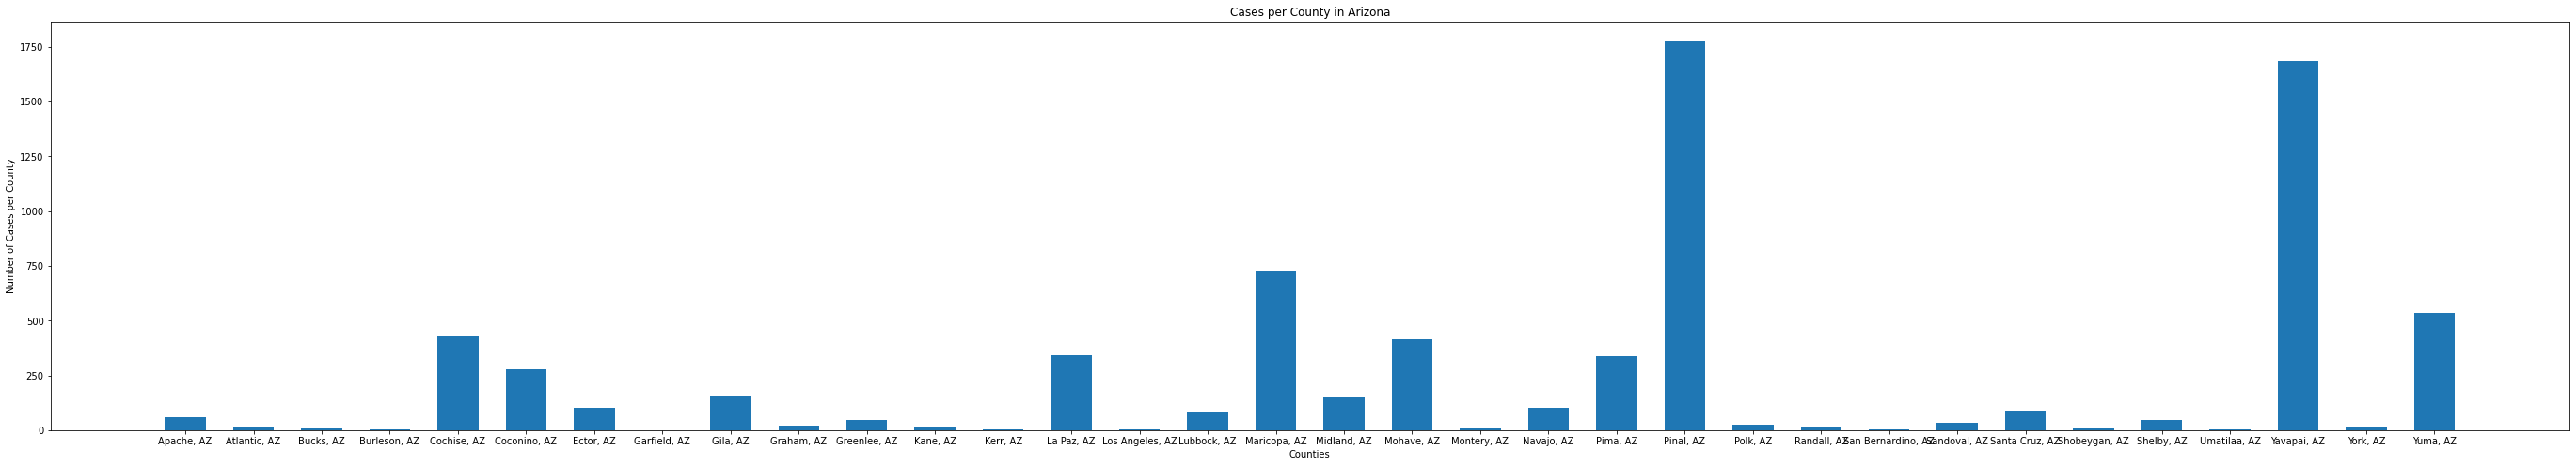

In [6]:
counties = ['Apache, AZ', 'Atlantic, AZ', 'Bucks, AZ', 'Burleson, AZ', 'Cochise, AZ', 'Coconino, AZ', 'Ector, AZ', 'Garfield, AZ', 'Gila, AZ', 'Graham, AZ', 'Greenlee, AZ', 'Kane, AZ', 'Kerr, AZ', 'La Paz, AZ', 'Los Angeles, AZ', 'Lubbock, AZ', 'Maricopa, AZ', 'Midland, AZ', 'Mohave, AZ', 'Montery, AZ', 'Navajo, AZ', 'Pima, AZ', 'Pinal, AZ', 'Polk, AZ', 'Randall, AZ', 'San Bernardino, AZ', 'Sandoval, AZ', 'Santa Cruz, AZ', 'Shobeygan, AZ', 'Shelby, AZ', 'Umatilaa, AZ', 'Yavapai, AZ', 'York, AZ', 'Yuma, AZ']
numbers_per_county_list = []
numbers_per_county = soup.select('.text-right')
for numbers_per in numbers_per_county:
    theThingToAdd = numbers_per.get_text()
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t\t\t', '')
    theThingToAdd = theThingToAdd.replace('\n\t\t\t\t\t\t\t\t\t', '')
    if theThingToAdd == 'Incident Count':
        continue
    else:
        theThingToAdd = theThingToAdd.replace('\t', '')
        theThingToAdd = theThingToAdd.replace(',', '')
        numbers_per_county_list.append(float(theThingToAdd))
print(numbers_per_county_list)

final_county_count_list = {key:value for key, value in zip(counties, numbers_per_county_list)}
print(final_county_count_list)

fig = plt.figure(figsize = (48, 8))
print(len(counties))
print(len(numbers_per_county_list))
plt.bar(counties, numbers_per_county_list, align='center', width=0.6)
plt.title('Cases per County in Arizona')
plt.xlabel('Counties')
plt.ylabel('Number of Cases per County')
plt.show()

In [7]:
#Apache scrapped_info
counties_without_az_dumbass = [county.replace(', AZ', '') for county in counties]
counties_all_caps = [counties_without_az_dumbas.upper() for counties_without_az_dumbas in counties_without_az_dumbass]
first_part_website_url = "https://istapwatersafe.com/epa-data/county/AZ/"

#for county_all_cap in counties_all_caps:
county_all_cap_apache = "APACHE"
the_final_website_apache = first_part_website_url + county_all_cap_apache + '/'
the_final_webpage_apache = requests.get(the_final_website_apache)
new_soup_apache = BeautifulSoup(the_final_webpage_apache.content, "html.parser")
table_rows_apache = new_soup_apache.find_all("tr")
temp_list_of_all_table_rows_apache = []

for table_row in table_rows_apache:
    temp_list_of_all_table_rows_apache.append(table_row.get_text('|'))

water_system_lists_apache = []
type_lists_apache = []
measure_apache = []
violation_apache = []
effects_apache = []
begin_date_apache = []

for temp in temp_list_of_all_table_rows_apache:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_apache.append(temp_list[1])
        type_lists_apache.append(temp_list[3])
        measure_apache.append(temp_list[5])
        violation_apache.append(temp_list[7])
        effects_apache.append(temp_list[9])
        begin_date_apache.append(temp_list[11])

apache_cases_super_list = []

for i in range(1, len(water_system_lists_apache)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_apache[i-1])
    list_to_modify.append(type_lists_apache[i-1])
    list_to_modify.append(measure_apache[i-1])
    list_to_modify.append(violation_apache[i-1])
    list_to_modify.append(effects_apache[i-1])
    list_to_modify.append(begin_date_apache[i-1])
    apache_cases_super_list.append(list_to_modify)

print(apache_cases_super_list)

with open('apacheCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(apache_cases_super_list))

import pandas as pd

apache_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_apache,
    'Type_of_Contamination' : type_lists_apache,
    'Measure': measure_apache,
    'Violation' : violation_apache,
    'Effects' : effects_apache,
    'Begin_Date' : begin_date_apache
})

apache_df.to_csv('apache_data_frame.csv')


[[1, 'SPRINGERVILLE TOWN OF', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [2, 'OLD CONCHO WATER USERS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [3, 'OLD CONCHO WATER USERS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [4, 'SPRINGERVILLE TOWN OF', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [5, 'OLD CONCHO WATER USERS', 'Coliform (

In [ ]:
for item in arsenic_cases_values

In [8]:
#Atlantic scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_atlantic = "ATLANTIC"
the_final_website_atlantic = first_part_website_url + county_all_cap_atlantic + '/'
the_final_webpage_atlantic = requests.get(the_final_website_atlantic)
new_soup_atlantic = BeautifulSoup(the_final_webpage_atlantic.content, "html.parser")
table_rows_atlantic = new_soup_atlantic.find_all("tr")
temp_list_of_all_table_rows_atlantic = []

for table_row in table_rows_atlantic:
    temp_list_of_all_table_rows_atlantic.append(table_row.get_text('|'))

water_system_lists_atlantic = []
type_lists_atlantic = []
measure_atlantic = []
violation_atlantic = []
effects_atlantic = []
begin_date_atlantic = []

for temp in temp_list_of_all_table_rows_atlantic:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_atlantic.append(temp_list[1])
        type_lists_atlantic.append(temp_list[3])
        measure_atlantic.append(temp_list[5])
        violation_atlantic.append(temp_list[7])
        effects_atlantic.append(temp_list[9])
        begin_date_atlantic.append(temp_list[11])

atlantic_cases_super_list = []

for i in range(1, len(water_system_lists_atlantic)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_atlantic[i-1])
    list_to_modify.append(type_lists_atlantic[i-1])
    list_to_modify.append(measure_atlantic[i-1])
    list_to_modify.append(violation_atlantic[i-1])
    list_to_modify.append(effects_atlantic[i-1])
    list_to_modify.append(begin_date_atlantic[i-1])
    atlantic_cases_super_list.append(list_to_modify)

print(atlantic_cases_super_list)

with open('atlanticCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(atlantic_cases_super_list))

atlantic_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_atlantic,
    'Type_of_Contamination' : type_lists_atlantic,
    'Measure': measure_atlantic,
    'Violation' : violation_atlantic,
    'Effects' : effects_atlantic,
    'Begin_Date' : begin_date_atlantic
})

print(atlantic_df)
atlantic_df.to_csv('atlantic_data_frame.csv')

[[1, 'SWAN LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-12-01'], [2, 'SWAN LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-12-01'], [3, 'SWAN LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-12-01'], [4, 'SWAN LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-12-01'], [5, 'SWAN LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)',

In [9]:
#Bucks scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_bucks = "BUCKS"
the_final_website_bucks = first_part_website_url + county_all_cap_bucks + '/'
the_final_webpage_bucks = requests.get(the_final_website_bucks)
new_soup_bucks = BeautifulSoup(the_final_webpage_bucks.content, "html.parser")
table_rows_bucks = new_soup_bucks.find_all("tr")
temp_list_of_all_table_rows_bucks = []

for table_row in table_rows_bucks:
    temp_list_of_all_table_rows_bucks.append(table_row.get_text('|'))

water_system_lists_bucks = []
type_lists_bucks = []
measure_bucks = []
violation_bucks = []
effects_bucks = []
begin_date_bucks = []

for temp in temp_list_of_all_table_rows_bucks:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_bucks.append(temp_list[1])
        type_lists_bucks.append(temp_list[3])
        measure_bucks.append(temp_list[5])
        violation_bucks.append(temp_list[7])
        effects_bucks.append(temp_list[9])
        begin_date_bucks.append(temp_list[11])

bucks_cases_super_list = []

for i in range(1, len(water_system_lists_bucks)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_bucks[i-1])
    list_to_modify.append(type_lists_bucks[i-1])
    list_to_modify.append(measure_bucks[i-1])
    list_to_modify.append(violation_bucks[i-1])
    list_to_modify.append(effects_bucks[i-1])
    list_to_modify.append(begin_date_bucks[i-1])
    bucks_cases_super_list.append(list_to_modify)

print(bucks_cases_super_list)

with open('bucksCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(bucks_cases_super_list))

bucks_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_bucks,
    'Type_of_Contamination' : type_lists_bucks,
    'Measure': measure_bucks,
    'Violation' : violation_bucks,
    'Effects' : effects_bucks,
    'Begin_Date' : begin_date_bucks
})

bucks_df.to_csv('bucks_data_frame.csv')

[[1, 'CLUBHOUSE FOR KIDS ONLY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2009-10-01'], [2, 'CLUBHOUSE FOR KIDS ONLY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2009-10-01'], [3, 'CLUBHOUSE FOR KIDS ONLY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2009-10-01'], [4, 'CLUBHOUSE FOR KIDS ONLY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2009-07-01'], [5, 'CLUBHOUSE FOR KIDS ONLY', 'Col

In [10]:
#Burleson scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_burleson = "BURLESON"
the_final_website_burleson = first_part_website_url + county_all_cap_burleson + '/'
the_final_webpage_burleson = requests.get(the_final_website_burleson)
new_soup_burleson = BeautifulSoup(the_final_webpage_burleson.content, "html.parser")
table_rows_burleson = new_soup_burleson.find_all("tr")
temp_list_of_all_table_rows_burleson = []

for table_row in table_rows_burleson:
    temp_list_of_all_table_rows_burleson.append(table_row.get_text('|'))

water_system_lists_burleson = []
type_lists_burleson = []
measure_burleson = []
violation_burleson = []
effects_burleson = []
begin_date_burleson = []

for temp in temp_list_of_all_table_rows_burleson:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_burleson.append(temp_list[1])
        type_lists_burleson.append(temp_list[3])
        measure_burleson.append(temp_list[5])
        violation_burleson.append(temp_list[7])
        effects_burleson.append(temp_list[9])
        begin_date_burleson.append(temp_list[11])

burleson_cases_super_list = []

for i in range(1, len(water_system_lists_burleson)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_burleson[i-1])
    list_to_modify.append(type_lists_burleson[i-1])
    list_to_modify.append(measure_burleson[i-1])
    list_to_modify.append(violation_burleson[i-1])
    list_to_modify.append(effects_burleson[i-1])
    list_to_modify.append(begin_date_burleson[i-1])
    burleson_cases_super_list.append(list_to_modify)

print(burleson_cases_super_list)

with open('burlesonCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(burleson_cases_super_list))

burleson_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_burleson,
    'Type_of_Contamination' : type_lists_burleson,
    'Measure': measure_burleson,
    'Violation' : violation_burleson,
    'Effects' : effects_burleson,
    'Begin_Date' : begin_date_burleson
})

burleson_df.to_csv('burleson_data_frame.csv')

[[1, '130 REGIONAL WSC', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01'], [2, '130 REGIONAL WSC', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01'], [3, '130 REGIONAL WSC', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01'], [4, '130 REGIONAL WSC', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01']]


In [11]:
#Cochise scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_cochise = "COCHISE"
the_final_website_cochise = first_part_website_url + county_all_cap_cochise + '/'
the_final_webpage_cochise = requests.get(the_final_website_cochise)
new_soup_cochise = BeautifulSoup(the_final_webpage_cochise.content, "html.parser")
table_rows_cochise = new_soup_cochise.find_all("tr")
temp_list_of_all_table_rows_cochise = []

for table_row in table_rows_cochise:
    temp_list_of_all_table_rows_cochise.append(table_row.get_text('|'))

water_system_lists_cochise = []
type_lists_cochise = []
measure_cochise = []
violation_cochise = []
effects_cochise = []
begin_date_cochise = []

for temp in temp_list_of_all_table_rows_cochise:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_cochise.append(temp_list[1])
        type_lists_cochise.append(temp_list[3])
        measure_cochise.append(temp_list[5])
        violation_cochise.append(temp_list[7])
        effects_cochise.append(temp_list[9])
        begin_date_cochise.append(temp_list[11])

cochise_cases_super_list = []

for i in range(1, len(water_system_lists_cochise)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_cochise[i-1])
    list_to_modify.append(type_lists_cochise[i-1])
    list_to_modify.append(measure_cochise[i-1])
    list_to_modify.append(violation_cochise[i-1])
    list_to_modify.append(effects_cochise[i-1])
    list_to_modify.append(begin_date_cochise[i-1])
    cochise_cases_super_list.append(list_to_modify)

print(cochise_cases_super_list)

with open('cochiseCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(cochise_cases_super_list))

cochise_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_cochise,
    'Type_of_Contamination' : type_lists_cochise,
    'Measure': measure_cochise,
    'Violation' : violation_cochise,
    'Effects' : effects_cochise,
    'Begin_Date' : begin_date_cochise
})

cochise_df.to_csv('cochise_data_frame.csv')

[[1, 'SAN SIMON DWID', 'Fluoride', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2018-10-01'], [2, 'SAN SIMON DWID', 'Fluoride', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2018-10-01'], [3, 'SAN SIMON DWID', 'Fluoride', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2018-10-01'], [4, 'MONTE VISTA WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [5, 'SAN SIMON DWID', 'Fluoride', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2018-07-01'], [6, 'MONTE VISTA WATER COMPANY', 'Arse

In [12]:
#Coconino scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_coconino = "COCONINO"
the_final_website_coconino = first_part_website_url + county_all_cap_coconino + '/'
the_final_webpage_coconino = requests.get(the_final_website_coconino)
new_soup_coconino = BeautifulSoup(the_final_webpage_coconino.content, "html.parser")
table_rows_coconino = new_soup_coconino.find_all("tr")
temp_list_of_all_table_rows_coconino = []

for table_row in table_rows_coconino:
    temp_list_of_all_table_rows_coconino.append(table_row.get_text('|'))

water_system_lists_coconino = []
type_lists_coconino = []
measure_coconino = []
violation_coconino = []
effects_coconino = []
begin_date_coconino = []

for temp in temp_list_of_all_table_rows_coconino:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_coconino.append(temp_list[1])
        type_lists_coconino.append(temp_list[3])
        measure_coconino.append(temp_list[5])
        violation_coconino.append(temp_list[7])
        effects_coconino.append(temp_list[9])
        begin_date_coconino.append(temp_list[11])

coconino_cases_super_list = []

for i in range(1, len(water_system_lists_coconino)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_coconino[i-1])
    list_to_modify.append(type_lists_coconino[i-1])
    list_to_modify.append(measure_coconino[i-1])
    list_to_modify.append(violation_coconino[i-1])
    list_to_modify.append(effects_coconino[i-1])
    list_to_modify.append(begin_date_coconino[i-1])
    coconino_cases_super_list.append(list_to_modify)

print(coconino_cases_super_list)

with open('coconinoCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(coconino_cases_super_list))

coconino_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_coconino,
    'Type_of_Contamination' : type_lists_coconino,
    'Measure': measure_coconino,
    'Violation' : violation_coconino,
    'Effects' : effects_coconino,
    'Begin_Date' : begin_date_coconino
})

coconino_df.to_csv('coconino_data_frame.csv')

[[1, 'FLAGSTAFF RANCH WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [2, 'FLAGSTAFF RANCH WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [3, 'FLAGSTAFF RANCH WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [4, 'CAMERON TRADING POST', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2018-04-01'], [5, 'CAMERON TRADING POST', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of canc

In [13]:
#Ector scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_ector = "ECTOR"
the_final_website_ector = first_part_website_url + county_all_cap_ector + '/'
the_final_webpage_ector = requests.get(the_final_website_ector)
new_soup_ector = BeautifulSoup(the_final_webpage_ector.content, "html.parser")
table_rows_ector = new_soup_ector.find_all("tr")
temp_list_of_all_table_rows_ector = []

for table_row in table_rows_ector:
    temp_list_of_all_table_rows_ector.append(table_row.get_text('|'))

water_system_lists_ector = []
type_lists_ector = []
measure_ector = []
violation_ector = []
effects_ector = []
begin_date_ector = []

for temp in temp_list_of_all_table_rows_ector:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_ector.append(temp_list[1])
        type_lists_ector.append(temp_list[3])
        measure_ector.append(temp_list[5])
        violation_ector.append(temp_list[7])
        effects_ector.append(temp_list[9])
        begin_date_ector.append(temp_list[11])

ector_cases_super_list = []

for i in range(1, len(water_system_lists_ector)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_ector[i-1])
    list_to_modify.append(type_lists_ector[i-1])
    list_to_modify.append(measure_ector[i-1])
    list_to_modify.append(violation_ector[i-1])
    list_to_modify.append(effects_ector[i-1])
    list_to_modify.append(begin_date_ector[i-1])
    ector_cases_super_list.append(list_to_modify)

print(ector_cases_super_list)

with open('ectorCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(ector_cases_super_list))

ector_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_ector,
    'Type_of_Contamination' : type_lists_ector,
    'Measure': measure_ector,
    'Violation' : violation_ector,
    'Effects' : effects_ector,
    'Begin_Date' : begin_date_ector
})

ector_df.to_csv('ector_data_frame.csv')

[[1, 'GARDENDALE MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2017-04-01'], [2, 'GARDENDALE MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2017-04-01'], [3, 'GARDENDALE MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2017-04-01'], 

In [14]:
#Garfield scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_garfield = "GARFIELD"
the_final_website_garfield = first_part_website_url + county_all_cap_garfield + '/'
the_final_webpage_garfield = requests.get(the_final_website_garfield)
new_soup_garfield = BeautifulSoup(the_final_webpage_garfield.content, "html.parser")
table_rows_garfield = new_soup_garfield.find_all("tr")
temp_list_of_all_table_rows_garfield = []

for table_row in table_rows_garfield:
    temp_list_of_all_table_rows_garfield.append(table_row.get_text('|'))

water_system_lists_garfield = []
type_lists_garfield = []
measure_garfield = []
violation_garfield = []
effects_garfield = []
begin_date_garfield = []

for temp in temp_list_of_all_table_rows_garfield:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_garfield.append(temp_list[1])
        type_lists_garfield.append(temp_list[3])
        measure_garfield.append(temp_list[5])
        violation_garfield.append(temp_list[7])
        effects_garfield.append(temp_list[9])
        begin_date_garfield.append(temp_list[11])

garfield_cases_super_list = []

for i in range(1, len(water_system_lists_garfield)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_garfield[i-1])
    list_to_modify.append(type_lists_garfield[i-1])
    list_to_modify.append(measure_garfield[i-1])
    list_to_modify.append(violation_garfield[i-1])
    list_to_modify.append(effects_garfield[i-1])
    list_to_modify.append(begin_date_garfield[i-1])
    garfield_cases_super_list.append(list_to_modify)

print(garfield_cases_super_list)

with open('garfieldCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(garfield_cases_super_list))

garfield_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_garfield,
    'Type_of_Contamination' : type_lists_garfield,
    'Measure': measure_garfield,
    'Violation' : violation_garfield,
    'Effects' : effects_garfield,
    'Begin_Date' : begin_date_garfield
})

garfield_df.to_csv('garfield_data_frame.csv')

[[1, 'PANGUITCH LAKE RESORT', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2008-08-01']]


In [15]:
#Gila scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_gila = "GILA"
the_final_website_gila = first_part_website_url + county_all_cap_gila + '/'
the_final_webpage_gila = requests.get(the_final_website_gila)
new_soup_gila = BeautifulSoup(the_final_webpage_gila.content, "html.parser")
table_rows_gila = new_soup_gila.find_all("tr")
temp_list_of_all_table_rows_gila = []

for table_row in table_rows_gila:
    temp_list_of_all_table_rows_gila.append(table_row.get_text('|'))

water_system_lists_gila = []
type_lists_gila = []
measure_gila = []
violation_gila = []
effects_gila = []
begin_date_gila = []

for temp in temp_list_of_all_table_rows_gila:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_gila.append(temp_list[1])
        type_lists_gila.append(temp_list[3])
        measure_gila.append(temp_list[5])
        violation_gila.append(temp_list[7])
        effects_gila.append(temp_list[9])
        begin_date_gila.append(temp_list[11])

gila_cases_super_list = []

for i in range(1, len(water_system_lists_gila)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_gila[i-1])
    list_to_modify.append(type_lists_gila[i-1])
    list_to_modify.append(measure_gila[i-1])
    list_to_modify.append(violation_gila[i-1])
    list_to_modify.append(effects_gila[i-1])
    list_to_modify.append(begin_date_gila[i-1])
    gila_cases_super_list.append(list_to_modify)

print(gila_cases_super_list)

with open('gilaCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(gila_cases_super_list))

gila_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_gila,
    'Type_of_Contamination' : type_lists_gila,
    'Measure': measure_gila,
    'Violation' : violation_gila,
    'Effects' : effects_gila,
    'Begin_Date' : begin_date_gila
})

gila_df.to_csv('gila_data_frame.csv')

[[1, 'USDA TNF GRAPEVINE CAMPGROUND', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2017-10-01'], [2, 'USDA TNF GRAPEVINE CAMPGROUND', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2017-10-01'], [3, 'USDA TNF GRAPEVINE CAMPGROUND', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2017-10-01'], [4, 'USDA TNF GRAPEVINE CAMPGROUND', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2017-10-01'], [5, 'USDA TNF GRAPEVINE CAMPGROUND', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems wit

In [16]:
#Graham scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_graham = "GRAHAM"
the_final_website_graham = first_part_website_url + county_all_cap_graham + '/'
the_final_webpage_graham = requests.get(the_final_website_graham)
new_soup_graham = BeautifulSoup(the_final_webpage_graham.content, "html.parser")
table_rows_graham = new_soup_graham.find_all("tr")
temp_list_of_all_table_rows_graham = []

for table_row in table_rows_graham:
    temp_list_of_all_table_rows_graham.append(table_row.get_text('|'))

water_system_lists_graham = []
type_lists_graham = []
measure_graham = []
violation_graham = []
effects_graham = []
begin_date_graham = []

for temp in temp_list_of_all_table_rows_graham:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_graham.append(temp_list[1])
        type_lists_graham.append(temp_list[3])
        measure_graham.append(temp_list[5])
        violation_graham.append(temp_list[7])
        effects_graham.append(temp_list[9])
        begin_date_graham.append(temp_list[11])

graham_cases_super_list = []

for i in range(1, len(water_system_lists_graham)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_graham[i-1])
    list_to_modify.append(type_lists_graham[i-1])
    list_to_modify.append(measure_graham[i-1])
    list_to_modify.append(violation_graham[i-1])
    list_to_modify.append(effects_graham[i-1])
    list_to_modify.append(begin_date_graham[i-1])
    graham_cases_super_list.append(list_to_modify)

print(graham_cases_super_list)

with open('grahamCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(graham_cases_super_list))

graham_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_graham,
    'Type_of_Contamination' : type_lists_graham,
    'Measure': measure_graham,
    'Violation' : violation_graham,
    'Effects' : effects_graham,
    'Begin_Date' : begin_date_graham
})

graham_df.to_csv('graham_data_frame.csv')

[[1, 'SAFFORD CITY OF', 'Fluoride', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2017-01-01'], [2, 'SAFFORD CITY OF', 'Fluoride', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2017-01-01'], [3, 'SAFFORD CITY OF', 'Fluoride', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2017-01-01'], [4, 'NATURESWEET USA', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2016-10-01'], [5, 'NATURESWEET USA', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', '

In [17]:
#Greenlee scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_greenlee = "GREENLEE"
the_final_website_greenlee = first_part_website_url + county_all_cap_greenlee + '/'
the_final_webpage_greenlee = requests.get(the_final_website_greenlee)
new_soup_greenlee = BeautifulSoup(the_final_webpage_greenlee.content, "html.parser")
table_rows_greenlee = new_soup_greenlee.find_all("tr")
temp_list_of_all_table_rows_greenlee = []

for table_row in table_rows_greenlee:
    temp_list_of_all_table_rows_greenlee.append(table_row.get_text('|'))

water_system_lists_greenlee = []
type_lists_greenlee = []
measure_greenlee = []
violation_greenlee = []
effects_greenlee = []
begin_date_greenlee = []

for temp in temp_list_of_all_table_rows_greenlee:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_greenlee.append(temp_list[1])
        type_lists_greenlee.append(temp_list[3])
        measure_greenlee.append(temp_list[5])
        violation_greenlee.append(temp_list[7])
        effects_greenlee.append(temp_list[9])
        begin_date_greenlee.append(temp_list[11])

greenlee_cases_super_list = []

for i in range(1, len(water_system_lists_greenlee)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_greenlee[i-1])
    list_to_modify.append(type_lists_greenlee[i-1])
    list_to_modify.append(measure_greenlee[i-1])
    list_to_modify.append(violation_greenlee[i-1])
    list_to_modify.append(effects_greenlee[i-1])
    list_to_modify.append(begin_date_greenlee[i-1])
    greenlee_cases_super_list.append(list_to_modify)

print(greenlee_cases_super_list)

with open('greenleeCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(greenlee_cases_super_list))

greenlee_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_greenlee,
    'Type_of_Contamination' : type_lists_greenlee,
    'Measure': measure_greenlee,
    'Violation' : violation_greenlee,
    'Effects' : effects_greenlee,
    'Begin_Date' : begin_date_greenlee
})

greenlee_df.to_csv('greenlee_data_frame.csv')

[[1, 'VERDE LEE WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2013-10-01'], [2, 'VERDE LEE WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2013-07-01'], [3, 'VERDE LEE WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2013-07-01'], [4, 'VERDE LEE WATER COMPANY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-10-01'], [5, 'VERDE LEE WATER COMPANY', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health t

In [18]:
#Kane scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_kane = "KANE"
the_final_website_kane = first_part_website_url + county_all_cap_kane + '/'
the_final_webpage_kane = requests.get(the_final_website_kane)
new_soup_kane = BeautifulSoup(the_final_webpage_kane.content, "html.parser")
table_rows_kane = new_soup_kane.find_all("tr")
temp_list_of_all_table_rows_kane = []

for table_row in table_rows_kane:
    temp_list_of_all_table_rows_kane.append(table_row.get_text('|'))

water_system_lists_kane = []
type_lists_kane = []
measure_kane = []
violation_kane = []
effects_kane = []
begin_date_kane = []

for temp in temp_list_of_all_table_rows_kane:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_kane.append(temp_list[1])
        type_lists_kane.append(temp_list[3])
        measure_kane.append(temp_list[5])
        violation_kane.append(temp_list[7])
        effects_kane.append(temp_list[9])
        begin_date_kane.append(temp_list[11])

kane_cases_super_list = []

for i in range(1, len(water_system_lists_kane)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_kane[i-1])
    list_to_modify.append(type_lists_kane[i-1])
    list_to_modify.append(measure_kane[i-1])
    list_to_modify.append(violation_kane[i-1])
    list_to_modify.append(effects_kane[i-1])
    list_to_modify.append(begin_date_kane[i-1])
    kane_cases_super_list.append(list_to_modify)

print(kane_cases_super_list)

with open('kaneCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(kane_cases_super_list))

kane_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_kane,
    'Type_of_Contamination' : type_lists_kane,
    'Measure': measure_kane,
    'Violation' : violation_kane,
    'Effects' : effects_kane,
    'Begin_Date' : begin_date_kane
})

kane_df.to_csv('kane_data_frame.csv')

[[1, 'CHURCH WELLS SSD', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-10-01'], [2, 'CHURCH WELLS SSD', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-10-01'], [3, 'CHURCH WELLS SSD', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-07-01'], [4, 'CHURCH WELLS SSD', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-07-01'], [5, 'CHURCH WELLS SSD', 'Coliform (TCR)', 'MCL, Monthly (TCR)',

In [19]:
#Kerr scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_kerr = "KERR"
the_final_website_kerr = first_part_website_url + county_all_cap_kerr + '/'
the_final_webpage_kerr = requests.get(the_final_website_kerr)
new_soup_kerr = BeautifulSoup(the_final_webpage_kerr.content, "html.parser")
table_rows_kerr = new_soup_kerr.find_all("tr")
temp_list_of_all_table_rows_kerr = []

for table_row in table_rows_kerr:
    temp_list_of_all_table_rows_kerr.append(table_row.get_text('|'))

water_system_lists_kerr = []
type_lists_kerr = []
measure_kerr = []
violation_kerr = []
effects_kerr = []
begin_date_kerr = []

for temp in temp_list_of_all_table_rows_kerr:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_kerr.append(temp_list[1])
        type_lists_kerr.append(temp_list[3])
        measure_kerr.append(temp_list[5])
        violation_kerr.append(temp_list[7])
        effects_kerr.append(temp_list[9])
        begin_date_kerr.append(temp_list[11])

kerr_cases_super_list = []

for i in range(1, len(water_system_lists_kerr)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_kerr[i-1])
    list_to_modify.append(type_lists_kerr[i-1])
    list_to_modify.append(measure_kerr[i-1])
    list_to_modify.append(violation_kerr[i-1])
    list_to_modify.append(effects_kerr[i-1])
    list_to_modify.append(begin_date_kerr[i-1])
    kerr_cases_super_list.append(list_to_modify)

print(kerr_cases_super_list)

with open('kerrCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(kerr_cases_super_list))

kerr_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_kerr,
    'Type_of_Contamination' : type_lists_kerr,
    'Measure': measure_kerr,
    'Violation' : violation_kerr,
    'Effects' : effects_kerr,
    'Begin_Date' : begin_date_kerr
})

kerr_df.to_csv('kerr_data_frame.csv')

[[1, 'WOOD TRAIL WATER SUPPLY', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-04-01'], [2, 'WOOD TRAIL WATER SUPPLY', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-04-01'], [3, 'WOOD TRAIL WATER SUPPLY', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-04-01'], [4, 'WOOD TRAIL WATER SUPPLY', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-04-01'], [5, 'WOOD TRAIL WATER SUPPLY', 'Coliform (T

In [20]:
#LA PAZ scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_lapaz = "LA PAZ"
the_final_website_lapaz = first_part_website_url + county_all_cap_lapaz + '/'
the_final_webpage_lapaz = requests.get(the_final_website_lapaz)
new_soup_lapaz = BeautifulSoup(the_final_webpage_lapaz.content, "html.parser")
table_rows_lapaz = new_soup_lapaz.find_all("tr")
temp_list_of_all_table_rows_lapaz = []

for table_row in table_rows_lapaz:
    temp_list_of_all_table_rows_lapaz.append(table_row.get_text('|'))

water_system_lists_lapaz = []
type_lists_lapaz = []
measure_lapaz = []
violation_lapaz = []
effects_lapaz = []
begin_date_lapaz = []

for temp in temp_list_of_all_table_rows_lapaz:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_lapaz.append(temp_list[1])
        type_lists_lapaz.append(temp_list[3])
        measure_lapaz.append(temp_list[5])
        violation_lapaz.append(temp_list[7])
        effects_lapaz.append(temp_list[9])
        begin_date_lapaz.append(temp_list[11])

lapaz_cases_super_list = []

for i in range(1, len(water_system_lists_lapaz)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_lapaz[i-1])
    list_to_modify.append(type_lists_lapaz[i-1])
    list_to_modify.append(measure_lapaz[i-1])
    list_to_modify.append(violation_lapaz[i-1])
    list_to_modify.append(effects_lapaz[i-1])
    list_to_modify.append(begin_date_lapaz[i-1])
    lapaz_cases_super_list.append(list_to_modify)

print(lapaz_cases_super_list)

with open('lapazCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(lapaz_cases_super_list))

lapaz_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_lapaz,
    'Type_of_Contamination' : type_lists_lapaz,
    'Measure': measure_lapaz,
    'Violation' : violation_lapaz,
    'Effects' : effects_lapaz,
    'Begin_Date' : begin_date_lapaz
})

lapaz_df.to_csv('lapaz_data_frame.csv')

[[1, 'BOUSE WORLEY WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [2, 'BOUSE WORLEY WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [3, 'BOUSE WORLEY WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [4, 'BOUSE WORLEY WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [5, 'CIBOLA MUTUAL WATER COMPANY', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems

In [21]:
#Los Angeles scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_losangeles = "LOS ANGELES"
the_final_website_losangeles = first_part_website_url + county_all_cap_losangeles + '/'
the_final_webpage_losangeles = requests.get(the_final_website_losangeles)
new_soup_losangeles = BeautifulSoup(the_final_webpage_losangeles.content, "html.parser")
table_rows_losangeles = new_soup_losangeles.find_all("tr")
temp_list_of_all_table_rows_losangeles = []

for table_row in table_rows_losangeles:
    temp_list_of_all_table_rows_losangeles.append(table_row.get_text('|'))

water_system_lists_losangeles = []
type_lists_losangeles = []
measure_losangeles = []
violation_losangeles = []
effects_losangeles = []
begin_date_losangeles = []

for temp in temp_list_of_all_table_rows_losangeles:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_losangeles.append(temp_list[1])
        type_lists_losangeles.append(temp_list[3])
        measure_losangeles.append(temp_list[5])
        violation_losangeles.append(temp_list[7])
        effects_losangeles.append(temp_list[9])
        begin_date_losangeles.append(temp_list[11])

losangeles_cases_super_list = []

for i in range(1, len(water_system_lists_losangeles)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_losangeles[i-1])
    list_to_modify.append(type_lists_losangeles[i-1])
    list_to_modify.append(measure_losangeles[i-1])
    list_to_modify.append(violation_losangeles[i-1])
    list_to_modify.append(effects_losangeles[i-1])
    list_to_modify.append(begin_date_losangeles[i-1])
    losangeles_cases_super_list.append(list_to_modify)

print(losangeles_cases_super_list)

with open('losangelesCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(losangeles_cases_super_list))

losangeles_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_losangeles,
    'Type_of_Contamination' : type_lists_losangeles,
    'Measure': measure_losangeles,
    'Violation' : violation_losangeles,
    'Effects' : effects_losangeles,
    'Begin_Date' : begin_date_losangeles
})

losangeles_df.to_csv('losangeles_data_frame.csv')

[[1, 'LEISURE LAKE MOBILE ESTATES', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2008-01-01'], [2, 'LEISURE LAKE MOBILE ESTATES', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2007-10-01']]


In [22]:
#Lubbock scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_lubbock = "LUBBOCK"
the_final_website_lubbock = first_part_website_url + county_all_cap_lubbock + '/'
the_final_webpage_lubbock = requests.get(the_final_website_lubbock)
new_soup_lubbock = BeautifulSoup(the_final_webpage_lubbock.content, "html.parser")
table_rows_lubbock = new_soup_lubbock.find_all("tr")
temp_list_of_all_table_rows_lubbock = []

for table_row in table_rows_lubbock:
    temp_list_of_all_table_rows_lubbock.append(table_row.get_text('|'))

water_system_lists_lubbock = []
type_lists_lubbock = []
measure_lubbock = []
violation_lubbock = []
effects_lubbock = []
begin_date_lubbock = []

for temp in temp_list_of_all_table_rows_lubbock:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_lubbock.append(temp_list[1])
        type_lists_lubbock.append(temp_list[3])
        measure_lubbock.append(temp_list[5])
        violation_lubbock.append(temp_list[7])
        effects_lubbock.append(temp_list[9])
        begin_date_lubbock.append(temp_list[11])

lubbock_cases_super_list = []

for i in range(1, len(water_system_lists_lubbock)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_lubbock[i-1])
    list_to_modify.append(type_lists_lubbock[i-1])
    list_to_modify.append(measure_lubbock[i-1])
    list_to_modify.append(violation_lubbock[i-1])
    list_to_modify.append(effects_lubbock[i-1])
    list_to_modify.append(begin_date_lubbock[i-1])
    lubbock_cases_super_list.append(list_to_modify)

print(lubbock_cases_super_list)

with open('lubbockCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(lubbock_cases_super_list))

lubbock_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_lubbock,
    'Type_of_Contamination' : type_lists_lubbock,
    'Measure': measure_lubbock,
    'Violation' : violation_lubbock,
    'Effects' : effects_lubbock,
    'Begin_Date' : begin_date_lubbock
})

lubbock_df.to_csv('lubbock_data_frame.csv')

[[1, 'DOLLAR GENERAL STORE 14889', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [2, 'DOLLAR GENERAL STORE 14889', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [3, 'DOLLAR GENERAL STORE 14889', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [4,

In [23]:
#Maricopa scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_maricopa = "MARICOPA"
the_final_website_maricopa = first_part_website_url + county_all_cap_maricopa + '/'
the_final_webpage_maricopa = requests.get(the_final_website_maricopa)
new_soup_maricopa = BeautifulSoup(the_final_webpage_maricopa.content, "html.parser")
table_rows_maricopa = new_soup_maricopa.find_all("tr")
temp_list_of_all_table_rows_maricopa = []

for table_row in table_rows_maricopa:
    temp_list_of_all_table_rows_maricopa.append(table_row.get_text('|'))

water_system_lists_maricopa = []
type_lists_maricopa = []
measure_maricopa = []
violation_maricopa = []
effects_maricopa = []
begin_date_maricopa = []

for temp in temp_list_of_all_table_rows_maricopa:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_maricopa.append(temp_list[1])
        type_lists_maricopa.append(temp_list[3])
        measure_maricopa.append(temp_list[5])
        violation_maricopa.append(temp_list[7])
        effects_maricopa.append(temp_list[9])
        begin_date_maricopa.append(temp_list[11])

maricopa_cases_super_list = []

for i in range(1, len(water_system_lists_maricopa)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_maricopa[i-1])
    list_to_modify.append(type_lists_maricopa[i-1])
    list_to_modify.append(measure_maricopa[i-1])
    list_to_modify.append(violation_maricopa[i-1])
    list_to_modify.append(effects_maricopa[i-1])
    list_to_modify.append(begin_date_maricopa[i-1])
    maricopa_cases_super_list.append(list_to_modify)

print(maricopa_cases_super_list)

with open('maricopaCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(maricopa_cases_super_list))

maricopa_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_maricopa,
    'Type_of_Contamination' : type_lists_maricopa,
    'Measure': measure_maricopa,
    'Violation' : violation_maricopa,
    'Effects' : effects_maricopa,
    'Begin_Date' : begin_date_maricopa
})

maricopa_df.to_csv('maricopa_data_frame.csv')

[[1, 'ARIZONA DAIRY COMPANY LLP', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [2, 'ARIZONA DAIRY COMPANY LLP', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [3, 'ARIZONA DAIRY COMPANY LLP', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [4, 'A

In [24]:
#Midland scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_midland = "MIDLAND"
the_final_website_midland = first_part_website_url + county_all_cap_midland + '/'
the_final_webpage_midland = requests.get(the_final_website_midland)
new_soup_midland = BeautifulSoup(the_final_webpage_midland.content, "html.parser")
table_rows_midland = new_soup_midland.find_all("tr")
temp_list_of_all_table_rows_midland = []

for table_row in table_rows_midland:
    temp_list_of_all_table_rows_midland.append(table_row.get_text('|'))

water_system_lists_midland = []
type_lists_midland = []
measure_midland = []
violation_midland = []
effects_midland = []
begin_date_midland = []

for temp in temp_list_of_all_table_rows_midland:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_midland.append(temp_list[1])
        type_lists_midland.append(temp_list[3])
        measure_midland.append(temp_list[5])
        violation_midland.append(temp_list[7])
        effects_midland.append(temp_list[9])
        begin_date_midland.append(temp_list[11])

midland_cases_super_list = []

for i in range(1, len(water_system_lists_midland)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_midland[i-1])
    list_to_modify.append(type_lists_midland[i-1])
    list_to_modify.append(measure_midland[i-1])
    list_to_modify.append(violation_midland[i-1])
    list_to_modify.append(effects_midland[i-1])
    list_to_modify.append(begin_date_midland[i-1])
    midland_cases_super_list.append(list_to_modify)

print(midland_cases_super_list)

with open('midlandCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(midland_cases_super_list))

midland_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_midland,
    'Type_of_Contamination' : type_lists_midland,
    'Measure': measure_midland,
    'Violation' : violation_midland,
    'Effects' : effects_midland,
    'Begin_Date' : begin_date_midland
})

midland_df.to_csv('midland_data_frame.csv')

[[1, 'GREENWOOD WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [2, 'GREENWOOD WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [3, 'GREENWOOD WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [4, 'GREENWOOD WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [5, 'GREENWOOD WATER SYSTEM', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have

In [25]:
#Mohave scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_mohave = "MOHAVE"
the_final_website_mohave = first_part_website_url + county_all_cap_mohave + '/'
the_final_webpage_mohave = requests.get(the_final_website_mohave)
new_soup_mohave = BeautifulSoup(the_final_webpage_mohave.content, "html.parser")
table_rows_mohave = new_soup_mohave.find_all("tr")
temp_list_of_all_table_rows_mohave = []

for table_row in table_rows_mohave:
    temp_list_of_all_table_rows_mohave.append(table_row.get_text('|'))

water_system_lists_mohave = []
type_lists_mohave = []
measure_mohave = []
violation_mohave = []
effects_mohave = []
begin_date_mohave = []

for temp in temp_list_of_all_table_rows_mohave:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_mohave.append(temp_list[1])
        type_lists_mohave.append(temp_list[3])
        measure_mohave.append(temp_list[5])
        violation_mohave.append(temp_list[7])
        effects_mohave.append(temp_list[9])
        begin_date_mohave.append(temp_list[11])

mohave_cases_super_list = []

for i in range(1, len(water_system_lists_mohave)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_mohave[i-1])
    list_to_modify.append(type_lists_mohave[i-1])
    list_to_modify.append(measure_mohave[i-1])
    list_to_modify.append(violation_mohave[i-1])
    list_to_modify.append(effects_mohave[i-1])
    list_to_modify.append(begin_date_mohave[i-1])
    mohave_cases_super_list.append(list_to_modify)

print(mohave_cases_super_list)

with open('mohaveCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(mohave_cases_super_list))

mohave_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_mohave,
    'Type_of_Contamination' : type_lists_mohave,
    'Measure': measure_mohave,
    'Violation' : violation_mohave,
    'Effects' : effects_mohave,
    'Begin_Date' : begin_date_mohave
})

mohave_df.to_csv('mohave_data_frame.csv')

[[1, 'WHITE HILLS WATER COMPANY UNIT 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [2, 'WHITE HILLS WATER COMPANY UNIT 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [3, 'DS WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [4, 'DS WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [5, 'DS WATER COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may ha

In [26]:
#Monterey scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_monterey = "MONTEREY"
the_final_website_monterey = first_part_website_url + county_all_cap_monterey + '/'
the_final_webpage_monterey = requests.get(the_final_website_monterey)
new_soup_monterey = BeautifulSoup(the_final_webpage_monterey.content, "html.parser")
table_rows_monterey = new_soup_monterey.find_all("tr")
temp_list_of_all_table_rows_monterey = []

for table_row in table_rows_monterey:
    temp_list_of_all_table_rows_monterey.append(table_row.get_text('|'))

water_system_lists_monterey = []
type_lists_monterey = []
measure_monterey = []
violation_monterey = []
effects_monterey = []
begin_date_monterey = []

for temp in temp_list_of_all_table_rows_monterey:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_monterey.append(temp_list[1])
        type_lists_monterey.append(temp_list[3])
        measure_monterey.append(temp_list[5])
        violation_monterey.append(temp_list[7])
        effects_monterey.append(temp_list[9])
        begin_date_monterey.append(temp_list[11])

monterey_cases_super_list = []

for i in range(1, len(water_system_lists_monterey)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_monterey[i-1])
    list_to_modify.append(type_lists_monterey[i-1])
    list_to_modify.append(measure_monterey[i-1])
    list_to_modify.append(violation_monterey[i-1])
    list_to_modify.append(effects_monterey[i-1])
    list_to_modify.append(begin_date_monterey[i-1])
    monterey_cases_super_list.append(list_to_modify)

print(monterey_cases_super_list)

with open('montereyCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(monterey_cases_super_list))

monterey_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_monterey,
    'Type_of_Contamination' : type_lists_monterey,
    'Measure': measure_monterey,
    'Violation' : violation_monterey,
    'Effects' : effects_monterey,
    'Begin_Date' : begin_date_monterey
})

monterey_df.to_csv('monterey_data_frame.csv')

[[1, 'GROWERS COMPANY INC WS', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2012-10-01'], [2, 'GROWERS COMPANY INC WS', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2012-10-01'], [3, 'GROWERS COMPANY INC WS', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2012-10-01'], [4, 'GROWERS CO

In [27]:
#Navajo scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_navajo = "NAVAJO"
the_final_website_navajo = first_part_website_url + county_all_cap_navajo + '/'
the_final_webpage_navajo = requests.get(the_final_website_navajo)
new_soup_navajo = BeautifulSoup(the_final_webpage_navajo.content, "html.parser")
table_rows_navajo = new_soup_navajo.find_all("tr")
temp_list_of_all_table_rows_navajo = []

for table_row in table_rows_navajo:
    temp_list_of_all_table_rows_navajo.append(table_row.get_text('|'))

water_system_lists_navajo = []
type_lists_navajo = []
measure_navajo = []
violation_navajo = []
effects_navajo = []
begin_date_navajo = []

for temp in temp_list_of_all_table_rows_navajo:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_navajo.append(temp_list[1])
        type_lists_navajo.append(temp_list[3])
        measure_navajo.append(temp_list[5])
        violation_navajo.append(temp_list[7])
        effects_navajo.append(temp_list[9])
        begin_date_navajo.append(temp_list[11])

navajo_cases_super_list = []

for i in range(1, len(water_system_lists_navajo)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_navajo[i-1])
    list_to_modify.append(type_lists_navajo[i-1])
    list_to_modify.append(measure_navajo[i-1])
    list_to_modify.append(violation_navajo[i-1])
    list_to_modify.append(effects_navajo[i-1])
    list_to_modify.append(begin_date_navajo[i-1])
    navajo_cases_super_list.append(list_to_modify)

print(navajo_cases_super_list)

with open('navajoCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(navajo_cases_super_list))

navajo_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_navajo,
    'Type_of_Contamination' : type_lists_navajo,
    'Measure': measure_navajo,
    'Violation' : violation_navajo,
    'Effects' : effects_navajo,
    'Begin_Date' : begin_date_navajo
})

navajo_df.to_csv('navajo_data_frame.csv')

[[1, 'PINEDALE DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-01-01'], [2, 'PINEDALE DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-01-01'], [3, 'HOLBROOK TRAVEL CENTER #246', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01'], [4, 'HOLBROOK TRAVEL CENTER #246', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2016-03-01'], [5, 'SEQUOIA VILLAGE SCHOOL', 'Selenium', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Hair or f

In [28]:
#Pima scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_pima = "PIMA"
the_final_website_pima = first_part_website_url + county_all_cap_pima + '/'
the_final_webpage_pima = requests.get(the_final_website_pima)
new_soup_pima = BeautifulSoup(the_final_webpage_pima.content, "html.parser")
table_rows_pima = new_soup_pima.find_all("tr")
temp_list_of_all_table_rows_pima = []

for table_row in table_rows_pima:
    temp_list_of_all_table_rows_pima.append(table_row.get_text('|'))

water_system_lists_pima = []
type_lists_pima = []
measure_pima = []
violation_pima = []
effects_pima = []
begin_date_pima = []

for temp in temp_list_of_all_table_rows_pima:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_pima.append(temp_list[1])
        type_lists_pima.append(temp_list[3])
        measure_pima.append(temp_list[5])
        violation_pima.append(temp_list[7])
        effects_pima.append(temp_list[9])
        begin_date_pima.append(temp_list[11])

pima_cases_super_list = []

for i in range(1, len(water_system_lists_pima)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_pima[i-1])
    list_to_modify.append(type_lists_pima[i-1])
    list_to_modify.append(measure_pima[i-1])
    list_to_modify.append(violation_pima[i-1])
    list_to_modify.append(effects_pima[i-1])
    list_to_modify.append(begin_date_pima[i-1])
    pima_cases_super_list.append(list_to_modify)

print(pima_cases_super_list)

with open('pimaCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(pima_cases_super_list))

pima_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_pima,
    'Type_of_Contamination' : type_lists_pima,
    'Measure': measure_pima,
    'Violation' : violation_pima,
    'Effects' : effects_pima,
    'Begin_Date' : begin_date_pima
})

pima_df.to_csv('pima_data_frame.csv')

[[1, 'WHY DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [2, 'WHY DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [3, 'WHY DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [4, 'WHY DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-04-01'], [5, 'WHY DWID', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-04-01'], [6, 'WHY DWID', 'Ar

In [29]:
#Pinal scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_pinal = "PINAL"
the_final_website_pinal = first_part_website_url + county_all_cap_pinal + '/'
the_final_webpage_pinal = requests.get(the_final_website_pinal)
new_soup_pinal = BeautifulSoup(the_final_webpage_pinal.content, "html.parser")
table_rows_pinal = new_soup_pinal.find_all("tr")
temp_list_of_all_table_rows_pinal = []

for table_row in table_rows_pinal:
    temp_list_of_all_table_rows_pinal.append(table_row.get_text('|'))

water_system_lists_pinal = []
type_lists_pinal = []
measure_pinal = []
violation_pinal = []
effects_pinal = []
begin_date_pinal = []

for temp in temp_list_of_all_table_rows_pinal:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_pinal.append(temp_list[1])
        type_lists_pinal.append(temp_list[3])
        measure_pinal.append(temp_list[5])
        violation_pinal.append(temp_list[7])
        effects_pinal.append(temp_list[9])
        begin_date_pinal.append(temp_list[11])

pinal_cases_super_list = []

for i in range(1, len(water_system_lists_pinal)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_pinal[i-1])
    list_to_modify.append(type_lists_pinal[i-1])
    list_to_modify.append(measure_pinal[i-1])
    list_to_modify.append(violation_pinal[i-1])
    list_to_modify.append(effects_pinal[i-1])
    list_to_modify.append(begin_date_pinal[i-1])
    pinal_cases_super_list.append(list_to_modify)

print(pinal_cases_super_list)

with open('pinalCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(pinal_cases_super_list))

pinal_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_pinal,
    'Type_of_Contamination' : type_lists_pinal,
    'Measure': measure_pinal,
    'Violation' : violation_pinal,
    'Effects' : effects_pinal,
    'Begin_Date' : begin_date_pinal
})

pinal_df.to_csv('pinal_data_frame.csv')

[[1, 'VILLA GRANDE DWID', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [2, 'AMERICAN REALTY MORTGAGE COMPANY', 'Fluoride', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Bone disease (pain and tenderness of the bones); Children may get mottled teeth', '2018-10-01'], [3, 'AZ STATE PARKS PICACHO PEAK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2018-10-01'], [4, 'AMERICAN REALTY MORTGAGE COMPANY', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with ci

In [30]:
#Polk scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_polk = "POLK"
the_final_website_polk = first_part_website_url + county_all_cap_polk + '/'
the_final_webpage_polk = requests.get(the_final_website_polk)
new_soup_polk = BeautifulSoup(the_final_webpage_polk.content, "html.parser")
table_rows_polk = new_soup_polk.find_all("tr")
temp_list_of_all_table_rows_polk = []

for table_row in table_rows_polk:
    temp_list_of_all_table_rows_polk.append(table_row.get_text('|'))

water_system_lists_polk = []
type_lists_polk = []
measure_polk = []
violation_polk = []
effects_polk = []
begin_date_polk = []

for temp in temp_list_of_all_table_rows_polk:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_polk.append(temp_list[1])
        type_lists_polk.append(temp_list[3])
        measure_polk.append(temp_list[5])
        violation_polk.append(temp_list[7])
        effects_polk.append(temp_list[9])
        begin_date_polk.append(temp_list[11])

polk_cases_super_list = []

for i in range(1, len(water_system_lists_polk)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_polk[i-1])
    list_to_modify.append(type_lists_polk[i-1])
    list_to_modify.append(measure_polk[i-1])
    list_to_modify.append(violation_polk[i-1])
    list_to_modify.append(effects_polk[i-1])
    list_to_modify.append(begin_date_polk[i-1])
    polk_cases_super_list.append(list_to_modify)

print(polk_cases_super_list)

with open('polkCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(polk_cases_super_list))

polk_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_polk,
    'Type_of_Contamination' : type_lists_polk,
    'Measure': measure_polk,
    'Violation' : violation_polk,
    'Effects' : effects_polk,
    'Begin_Date' : begin_date_polk
})

polk_df.to_csv('polk_data_frame.csv')

[[1, 'LAKE MEADOWS MHP', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-11-01'], [2, 'LAKE MEADOWS MHP', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-11-01'], [3, 'LAKE MEADOWS MHP', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-11-01'], [4, 'LAKE MEADOWS MHP', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-11-01'], [5, 'LAKE MEADOWS MHP', 'Coliform (TCR)', 'MCL, Monthly (TCR)',

In [31]:
#Randall scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_randall = "RANDALL"
the_final_website_randall = first_part_website_url + county_all_cap_randall + '/'
the_final_webpage_randall = requests.get(the_final_website_randall)
new_soup_randall = BeautifulSoup(the_final_webpage_randall.content, "html.parser")
table_rows_randall = new_soup_randall.find_all("tr")
temp_list_of_all_table_rows_randall = []

for table_row in table_rows_randall:
    temp_list_of_all_table_rows_randall.append(table_row.get_text('|'))

water_system_lists_randall = []
type_lists_randall = []
measure_randall = []
violation_randall = []
effects_randall = []
begin_date_randall = []

for temp in temp_list_of_all_table_rows_randall:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_randall.append(temp_list[1])
        type_lists_randall.append(temp_list[3])
        measure_randall.append(temp_list[5])
        violation_randall.append(temp_list[7])
        effects_randall.append(temp_list[9])
        begin_date_randall.append(temp_list[11])

randall_cases_super_list = []

for i in range(1, len(water_system_lists_randall)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_randall[i-1])
    list_to_modify.append(type_lists_randall[i-1])
    list_to_modify.append(measure_randall[i-1])
    list_to_modify.append(violation_randall[i-1])
    list_to_modify.append(effects_randall[i-1])
    list_to_modify.append(begin_date_randall[i-1])
    randall_cases_super_list.append(list_to_modify)

print(randall_cases_super_list)

with open('randallCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(randall_cases_super_list))

randall_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_randall,
    'Type_of_Contamination' : type_lists_randall,
    'Measure': measure_randall,
    'Violation' : violation_randall,
    'Effects' : effects_randall,
    'Begin_Date' : begin_date_randall
})

randall_df.to_csv('randall_data_frame.csv')

[[1, 'COUNTRY ESTATES MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2009-07-01'], [2, 'COUNTRY ESTATES MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2009-07-01'], [3, 'COUNTRY ESTATES MOBILE HOME PARK', 'Nitrate', 'MCL, Single Sample', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', 

In [32]:
#San Bernardino scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_sanbernardino = "SAN BERNARDINO"
the_final_website_sanbernardino = first_part_website_url + county_all_cap_sanbernardino + '/'
the_final_webpage_sanbernardino = requests.get(the_final_website_sanbernardino)
new_soup_sanbernardino = BeautifulSoup(the_final_webpage_sanbernardino.content, "html.parser")
table_rows_sanbernardino = new_soup_sanbernardino.find_all("tr")
temp_list_of_all_table_rows_sanbernardino = []

for table_row in table_rows_sanbernardino:
    temp_list_of_all_table_rows_sanbernardino.append(table_row.get_text('|'))

water_system_lists_sanbernardino = []
type_lists_sanbernardino = []
measure_sanbernardino = []
violation_sanbernardino = []
effects_sanbernardino = []
begin_date_sanbernardino = []

for temp in temp_list_of_all_table_rows_sanbernardino:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_sanbernardino.append(temp_list[1])
        type_lists_sanbernardino.append(temp_list[3])
        measure_sanbernardino.append(temp_list[5])
        violation_sanbernardino.append(temp_list[7])
        effects_sanbernardino.append(temp_list[9])
        begin_date_sanbernardino.append(temp_list[11])

sanbernardino_cases_super_list = []

for i in range(1, len(water_system_lists_sanbernardino)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_sanbernardino[i-1])
    list_to_modify.append(type_lists_sanbernardino[i-1])
    list_to_modify.append(measure_sanbernardino[i-1])
    list_to_modify.append(violation_sanbernardino[i-1])
    list_to_modify.append(effects_sanbernardino[i-1])
    list_to_modify.append(begin_date_sanbernardino[i-1])
    sanbernardino_cases_super_list.append(list_to_modify)

print(sanbernardino_cases_super_list)

with open('sanbernardinoCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(sanbernardino_cases_super_list))

sanbernardino_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_sanbernardino,
    'Type_of_Contamination' : type_lists_sanbernardino,
    'Measure': measure_sanbernardino,
    'Violation' : violation_sanbernardino,
    'Effects' : effects_sanbernardino,
    'Begin_Date' : begin_date_sanbernardino
})

sanbernardino_df.to_csv('sanbernardino_data_frame.csv')

[[1, 'WINDMILL RESORT', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2014-04-01'], [2, 'WINDMILL RESORT', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2014-04-01'], [3, 'CAMP WATERMAN MWC', 'Coliform (TCR)', 'MCL, Acute (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2013-06-01']]


In [33]:
#Sandoval scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_sandoval = "SANDOVAL"
the_final_website_sandoval = first_part_website_url + county_all_cap_sandoval + '/'
the_final_webpage_sandoval = requests.get(the_final_website_sandoval)
new_soup_sandoval = BeautifulSoup(the_final_webpage_sandoval.content, "html.parser")
table_rows_sandoval = new_soup_sandoval.find_all("tr")
temp_list_of_all_table_rows_sandoval = []

for table_row in table_rows_sandoval:
    temp_list_of_all_table_rows_sandoval.append(table_row.get_text('|'))

water_system_lists_sandoval = []
type_lists_sandoval = []
measure_sandoval = []
violation_sandoval = []
effects_sandoval = []
begin_date_sandoval = []

for temp in temp_list_of_all_table_rows_sandoval:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_sandoval.append(temp_list[1])
        type_lists_sandoval.append(temp_list[3])
        measure_sandoval.append(temp_list[5])
        violation_sandoval.append(temp_list[7])
        effects_sandoval.append(temp_list[9])
        begin_date_sandoval.append(temp_list[11])

sandoval_cases_super_list = []

for i in range(1, len(water_system_lists_sandoval)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_sandoval[i-1])
    list_to_modify.append(type_lists_sandoval[i-1])
    list_to_modify.append(measure_sandoval[i-1])
    list_to_modify.append(violation_sandoval[i-1])
    list_to_modify.append(effects_sandoval[i-1])
    list_to_modify.append(begin_date_sandoval[i-1])
    sandoval_cases_super_list.append(list_to_modify)

print(sandoval_cases_super_list)

with open('sandovalCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(sandoval_cases_super_list))

sandoval_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_sandoval,
    'Type_of_Contamination' : type_lists_sandoval,
    'Measure': measure_sandoval,
    'Violation' : violation_sandoval,
    'Effects' : effects_sandoval,
    'Begin_Date' : begin_date_sandoval
})

sandoval_df.to_csv('sandoval_data_frame.csv')

[[1, 'ALBUQUERQUE NORTH KOA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-01-01'], [2, 'ALBUQUERQUE NORTH KOA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-01-01'], [3, 'ALBUQUERQUE NORTH KOA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-01-01'], [4, 'ALBUQUERQUE NORTH KOA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-01-01'], [5, 'ALBUQUERQUE NORTH KOA', 'Arsenic', 'MC

In [34]:
#Santa Cruz scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_santacruz = "SANTA CRUZ"
the_final_website_santacruz = first_part_website_url + county_all_cap_santacruz + '/'
the_final_webpage_santacruz = requests.get(the_final_website_santacruz)
new_soup_santacruz = BeautifulSoup(the_final_webpage_santacruz.content, "html.parser")
table_rows_santacruz = new_soup_santacruz.find_all("tr")
temp_list_of_all_table_rows_santacruz = []

for table_row in table_rows_santacruz:
    temp_list_of_all_table_rows_santacruz.append(table_row.get_text('|'))

water_system_lists_santacruz = []
type_lists_santacruz = []
measure_santacruz = []
violation_santacruz = []
effects_santacruz = []
begin_date_santacruz = []

for temp in temp_list_of_all_table_rows_santacruz:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_santacruz.append(temp_list[1])
        type_lists_santacruz.append(temp_list[3])
        measure_santacruz.append(temp_list[5])
        violation_santacruz.append(temp_list[7])
        effects_santacruz.append(temp_list[9])
        begin_date_santacruz.append(temp_list[11])

santacruz_cases_super_list = []

for i in range(1, len(water_system_lists_santacruz)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_santacruz[i-1])
    list_to_modify.append(type_lists_santacruz[i-1])
    list_to_modify.append(measure_santacruz[i-1])
    list_to_modify.append(violation_santacruz[i-1])
    list_to_modify.append(effects_santacruz[i-1])
    list_to_modify.append(begin_date_santacruz[i-1])
    santacruz_cases_super_list.append(list_to_modify)

print(santacruz_cases_super_list)

with open('santacruzCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(santacruz_cases_super_list))

santacruz_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_santacruz,
    'Type_of_Contamination' : type_lists_santacruz,
    'Measure': measure_santacruz,
    'Violation' : violation_santacruz,
    'Effects' : effects_santacruz,
    'Begin_Date' : begin_date_santacruz
})

santacruz_df.to_csv('santacruz_data_frame.csv')

[[1, 'ADOT SONOITA REST AREA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [2, 'VALLE VERDE WATER COMPANY - EAST', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [3, 'VALLE VERDE WATER COMPANY - EAST', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [4, 'ADOT SONOITA REST AREA', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2015-08-01'], [5, 'SMITHSONIAN IN

In [35]:
#Shebyogan scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_sheboygan = "SHEBOYGAN"
the_final_website_sheboygan = first_part_website_url + county_all_cap_sheboygan + '/'
the_final_webpage_sheboygan = requests.get(the_final_website_sheboygan)
new_soup_sheboygan = BeautifulSoup(the_final_webpage_sheboygan.content, "html.parser")
table_rows_sheboygan = new_soup_sheboygan.find_all("tr")
temp_list_of_all_table_rows_sheboygan = []

for table_row in table_rows_sheboygan:
    temp_list_of_all_table_rows_sheboygan.append(table_row.get_text('|'))

water_system_lists_sheboygan = []
type_lists_sheboygan = []
measure_sheboygan = []
violation_sheboygan = []
effects_sheboygan = []
begin_date_sheboygan = []

for temp in temp_list_of_all_table_rows_sheboygan:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_sheboygan.append(temp_list[1])
        type_lists_sheboygan.append(temp_list[3])
        measure_sheboygan.append(temp_list[5])
        violation_sheboygan.append(temp_list[7])
        effects_sheboygan.append(temp_list[9])
        begin_date_sheboygan.append(temp_list[11])

sheboygan_cases_super_list = []

for i in range(1, len(water_system_lists_sheboygan)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_sheboygan[i-1])
    list_to_modify.append(type_lists_sheboygan[i-1])
    list_to_modify.append(measure_sheboygan[i-1])
    list_to_modify.append(violation_sheboygan[i-1])
    list_to_modify.append(effects_sheboygan[i-1])
    list_to_modify.append(begin_date_sheboygan[i-1])
    sheboygan_cases_super_list.append(list_to_modify)

print(sheboygan_cases_super_list)

with open('sheboyganCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(sheboygan_cases_super_list))

sheboygan_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_sheboygan,
    'Type_of_Contamination' : type_lists_sheboygan,
    'Measure': measure_sheboygan,
    'Violation' : violation_sheboygan,
    'Effects' : effects_sheboygan,
    'Begin_Date' : begin_date_sheboygan
})

sheboygan_df.to_csv('sheboygan_data_frame.csv')

[[1, 'SHELLY SCHMITT EXOTIC TANS AND SPA - CURVES - NESEMANNS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2014-07-01'], [2, 'SHELLY SCHMITT EXOTIC TANS AND SPA - CURVES - NESEMANNS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2014-07-01'], [3, 'SHELLY SCHMITT EXOTIC TANS AND SPA - CURVES - NESEMANNS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2014-07-01'], [4, 'SHELLY SCHMITT EXOTIC TANS AND SPA - CURVES - NESEMANNS', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is 

In [36]:
#Shelby scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_shelby = "SHELBY"
the_final_website_shelby = first_part_website_url + county_all_cap_shelby + '/'
the_final_webpage_shelby = requests.get(the_final_website_shelby)
new_soup_shelby = BeautifulSoup(the_final_webpage_shelby.content, "html.parser")
table_rows_shelby = new_soup_shelby.find_all("tr")
temp_list_of_all_table_rows_shelby = []

for table_row in table_rows_shelby:
    temp_list_of_all_table_rows_shelby.append(table_row.get_text('|'))

water_system_lists_shelby = []
type_lists_shelby = []
measure_shelby = []
violation_shelby = []
effects_shelby = []
begin_date_shelby = []

for temp in temp_list_of_all_table_rows_shelby:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_shelby.append(temp_list[1])
        type_lists_shelby.append(temp_list[3])
        measure_shelby.append(temp_list[5])
        violation_shelby.append(temp_list[7])
        effects_shelby.append(temp_list[9])
        begin_date_shelby.append(temp_list[11])

shelby_cases_super_list = []

for i in range(1, len(water_system_lists_shelby)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_shelby[i-1])
    list_to_modify.append(type_lists_shelby[i-1])
    list_to_modify.append(measure_shelby[i-1])
    list_to_modify.append(violation_shelby[i-1])
    list_to_modify.append(effects_shelby[i-1])
    list_to_modify.append(begin_date_shelby[i-1])
    shelby_cases_super_list.append(list_to_modify)

print(shelby_cases_super_list)

with open('shelbyCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(shelby_cases_super_list))

shelby_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_shelby,
    'Type_of_Contamination' : type_lists_shelby,
    'Measure': measure_shelby,
    'Violation' : violation_shelby,
    'Effects' : effects_shelby,
    'Begin_Date' : begin_date_shelby
})

shelby_df.to_csv('shelby_data_frame.csv')

[[1, 'ROLLING HILLS SUBDIVISION', 'Total Haloacetic Acids (HAA5)', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Increased risk of cancer', '2010-01-01'], [2, 'ROLLING HILLS SUBDIVISION', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2010-01-01'], [3, 'ROLLING HILLS SUBDIVISION', 'Total Haloacetic Acids (HAA5)', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Increased risk of cancer', '2010-01-01'], [4, 'ROLLING HILLS SUBDIVISION', 'Total Haloacetic Acids (HAA5)', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Increased risk of cancer', '2010-01-01'], [5, 'ROLLING HILLS SUBDIVISION', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2010-01-01'], [6, 'ROLLING HILLS SUBDIVISION', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous

In [37]:
#Umatilla scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_umatilla = "UMATILLA"
the_final_website_umatilla = first_part_website_url + county_all_cap_umatilla + '/'
the_final_webpage_umatilla = requests.get(the_final_website_umatilla)
new_soup_umatilla = BeautifulSoup(the_final_webpage_umatilla.content, "html.parser")
table_rows_umatilla = new_soup_umatilla.find_all("tr")
temp_list_of_all_table_rows_umatilla = []

for table_row in table_rows_umatilla:
    temp_list_of_all_table_rows_umatilla.append(table_row.get_text('|'))

water_system_lists_umatilla = []
type_lists_umatilla = []
measure_umatilla = []
violation_umatilla = []
effects_umatilla = []
begin_date_umatilla = []

for temp in temp_list_of_all_table_rows_umatilla:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_umatilla.append(temp_list[1])
        type_lists_umatilla.append(temp_list[3])
        measure_umatilla.append(temp_list[5])
        violation_umatilla.append(temp_list[7])
        effects_umatilla.append(temp_list[9])
        begin_date_umatilla.append(temp_list[11])

umatilla_cases_super_list = []

for i in range(1, len(water_system_lists_umatilla)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_umatilla[i-1])
    list_to_modify.append(type_lists_umatilla[i-1])
    list_to_modify.append(measure_umatilla[i-1])
    list_to_modify.append(violation_umatilla[i-1])
    list_to_modify.append(effects_umatilla[i-1])
    list_to_modify.append(begin_date_umatilla[i-1])
    umatilla_cases_super_list.append(list_to_modify)

print(umatilla_cases_super_list)

with open('umatillaCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(umatilla_cases_super_list))

umatilla_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_umatilla,
    'Type_of_Contamination' : type_lists_umatilla,
    'Measure': measure_umatilla,
    'Violation' : violation_umatilla,
    'Effects' : effects_umatilla,
    'Begin_Date' : begin_date_umatilla
})

umatilla_df.to_csv('umatilla_data_frame.csv')

[[1, 'VILLADOM MOBILE HOME PARK', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-11-01'], [2, 'VILLADOM MOBILE HOME PARK', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-11-01'], [3, 'VILLADOM MOBILE HOME PARK', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-11-01'], [4, 'VILLADOM MOBILE HOME PARK', 'Coliform (TCR)', 'MCL, Monthly (TCR)', 'Maximum Contaminant Level Violation', 'Not a health threat in itself; it is used to indicate whether other potentially harmful bacteria may be present5', '2012-11-01']]


In [38]:
#Yavapai scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_yavapai = "YAVAPAI"
the_final_website_yavapai = first_part_website_url + county_all_cap_yavapai + '/'
the_final_webpage_yavapai = requests.get(the_final_website_yavapai)
new_soup_yavapai = BeautifulSoup(the_final_webpage_yavapai.content, "html.parser")
table_rows_yavapai = new_soup_yavapai.find_all("tr")
temp_list_of_all_table_rows_yavapai = []

for table_row in table_rows_yavapai:
    temp_list_of_all_table_rows_yavapai.append(table_row.get_text('|'))

water_system_lists_yavapai = []
type_lists_yavapai = []
measure_yavapai = []
violation_yavapai = []
effects_yavapai = []
begin_date_yavapai = []

for temp in temp_list_of_all_table_rows_yavapai:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_yavapai.append(temp_list[1])
        type_lists_yavapai.append(temp_list[3])
        measure_yavapai.append(temp_list[5])
        violation_yavapai.append(temp_list[7])
        effects_yavapai.append(temp_list[9])
        begin_date_yavapai.append(temp_list[11])

yavapai_cases_super_list = []

for i in range(1, len(water_system_lists_yavapai)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_yavapai[i-1])
    list_to_modify.append(type_lists_yavapai[i-1])
    list_to_modify.append(measure_yavapai[i-1])
    list_to_modify.append(violation_yavapai[i-1])
    list_to_modify.append(effects_yavapai[i-1])
    list_to_modify.append(begin_date_yavapai[i-1])
    yavapai_cases_super_list.append(list_to_modify)

print(yavapai_cases_super_list)

with open('yavapaiCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(yavapai_cases_super_list))

yavapai_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_yavapai,
    'Type_of_Contamination' : type_lists_yavapai,
    'Measure': measure_yavapai,
    'Violation' : violation_yavapai,
    'Effects' : effects_yavapai,
    'Begin_Date' : begin_date_yavapai
})

yavapai_df.to_csv('yavapai_data_frame.csv')

[[1, 'OAK CREEK WATER CO 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [2, 'OAK CREEK WATER CO 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-10-01'], [3, 'RIO VERDE RV PARK', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [4, 'OAK CREEK WATER CO 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [5, 'OAK CREEK WATER CO 1', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased ri

In [39]:
#York scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_york = "YORK"
the_final_website_york = first_part_website_url + county_all_cap_york + '/'
the_final_webpage_york = requests.get(the_final_website_york)
new_soup_york = BeautifulSoup(the_final_webpage_york.content, "html.parser")
table_rows_york = new_soup_york.find_all("tr")
temp_list_of_all_table_rows_york = []

for table_row in table_rows_york:
    temp_list_of_all_table_rows_york.append(table_row.get_text('|'))

water_system_lists_york = []
type_lists_york = []
measure_york = []
violation_york = []
effects_york = []
begin_date_york = []

for temp in temp_list_of_all_table_rows_york:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_york.append(temp_list[1])
        type_lists_york.append(temp_list[3])
        measure_york.append(temp_list[5])
        violation_york.append(temp_list[7])
        effects_york.append(temp_list[9])
        begin_date_york.append(temp_list[11])

york_cases_super_list = []

for i in range(1, len(water_system_lists_york)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_york[i-1])
    list_to_modify.append(type_lists_york[i-1])
    list_to_modify.append(measure_york[i-1])
    list_to_modify.append(violation_york[i-1])
    list_to_modify.append(effects_york[i-1])
    list_to_modify.append(begin_date_york[i-1])
    york_cases_super_list.append(list_to_modify)

print(york_cases_super_list)

with open('yorkCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(york_cases_super_list))

york_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_york,
    'Type_of_Contamination' : type_lists_york,
    'Measure': measure_york,
    'Violation' : violation_york,
    'Effects' : effects_york,
    'Begin_Date' : begin_date_york
})

york_df.to_csv('york_data_frame.csv')

[[1, 'CHARTER OAK MOBILE HOME VILLAGE', 'Nitrate', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrate in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2015-01-01'], [2, 'CHARTER OAK MOBILE HOME VILLAGE', 'Nitrate', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2015-01-01'], [3, 'CHARTER OAK MOBILE HOME VILLAGE', 'Nitrate', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Infants below the age of six months who drink water containing nitrite in excess of the MCL could become seriously ill and, if untreated, may die. Symptoms include shortness of breath and blue-baby syndrome.', '2015-01-01'], [4, 'C

In [40]:
#Yuma scrapped_info

#for county_all_cap in counties_all_caps:
county_all_cap_yuma = "YUMA"
the_final_website_yuma = first_part_website_url + county_all_cap_yuma + '/'
the_final_webpage_yuma = requests.get(the_final_website_yuma)
new_soup_yuma = BeautifulSoup(the_final_webpage_yuma.content, "html.parser")
table_rows_yuma = new_soup_yuma.find_all("tr")
temp_list_of_all_table_rows_yuma = []

for table_row in table_rows_yuma:
    temp_list_of_all_table_rows_yuma.append(table_row.get_text('|'))

water_system_lists_yuma = []
type_lists_yuma = []
measure_yuma = []
violation_yuma = []
effects_yuma = []
begin_date_yuma = []

for temp in temp_list_of_all_table_rows_yuma:
    temp_list = temp.split('|')
    if temp_list[1] == 'Water System':
        continue
    else:
        water_system_lists_yuma.append(temp_list[1])
        type_lists_yuma.append(temp_list[3])
        measure_yuma.append(temp_list[5])
        violation_yuma.append(temp_list[7])
        effects_yuma.append(temp_list[9])
        begin_date_yuma.append(temp_list[11])

yuma_cases_super_list = []

for i in range(1, len(water_system_lists_yuma)+1):
    list_to_modify = []
    list_to_modify.append(i)
    list_to_modify.append(water_system_lists_yuma[i-1])
    list_to_modify.append(type_lists_yuma[i-1])
    list_to_modify.append(measure_yuma[i-1])
    list_to_modify.append(violation_yuma[i-1])
    list_to_modify.append(effects_yuma[i-1])
    list_to_modify.append(begin_date_yuma[i-1])
    yuma_cases_super_list.append(list_to_modify)

print(yuma_cases_super_list)

with open('yumaCasesFinalized.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(yuma_cases_super_list))

yuma_df = pd.DataFrame({
    'Water_System_List' : water_system_lists_yuma,
    'Type_of_Contamination' : type_lists_yuma,
    'Measure': measure_yuma,
    'Violation' : violation_yuma,
    'Effects' : effects_yuma,
    'Begin_Date' : begin_date_yuma
})

yuma_df.to_csv('yuma_data_frame.csv')

[[1, 'WELLTON TOWN OF', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2018-10-01'], [2, 'MOHAWK VALLEY SCHOOL DISTRICT', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2018-10-01'], [3, 'MOHAWK VALLEY SCHOOL DISTRICT', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2018-10-01'], [4, 'WELLTON TOWN OF', 'TTHM', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Liver, kidney or central nervous system problems; increased risk of cancer', '2018-10-01'], [5, 'SIERRA PACIFIC MOBILE MANOR', 'Arsenic', 'MCL, Average', 'Maximum Contaminant Level Violation', 'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer', '2018-07-01'], [6, 'EL PRADO WATER COMPANY', 'Arsenic',

In [85]:
all_states_dict = {"Alabama": 0,
"Alaska": 686,
"Arizona": 6217,
"Arkansas": 32,
"California": 10664,
"Colorado": 257,
"Connecticut": 1014,
"Delaware": 0,
"Florida": 416,
"Georgia": 581,
"Hawaii": 78,
"Idaho": 1712,
"Illinois": 3921, 
"Indiana": 2216,
"Iowa": 1092,
"Kansas": 1662,
"Kentucky": 0,
"Louisiana": 1387,
"Maine": 1586,
"Maryland": 302,
"Massachusetts": 523,
"Michigan": 1381,
"Minnesota": 1214,
"Mississippi": 22,
"Missouri": 8,
"Montana": 2378,
"Nebraska": 2116,
"Nevada": 1649,
"New Hampshire": 3652,
"New Jersey": 848,
"New Mexico": 6600,
"New York": 3289,
"North Carolina": 32,
"North Dakota": 342,
"Ohio": 1437,
"Oklahoma": 1526,
"Oregon": 1711,
"Pennsylvania": 1103,
"Rhode Island": 0,
"South Carolina": 24,
"South Dakota": 1013,
"Tennessee": 42,
"Texas": 17903,
"Utah": 95,
"Vermont": 190,
"Virginia": 214,
"Washington": 347,
"West Virginia": 126,
"Wisconsin": 4524,
"Wyoming": 16}

all_states_list = sorted(all_states_dict.items(),  key=lambda x:x[1])
all_states_dict_sorted = dict(all_states_list)

print(all_states_dict_sorted)

with open('allStatesArsenicDict.txt', 'w') as file_writer_cont:
    file_writer_cont.write(str(all_states_dict_sorted))

all_states_arsenic_df = pd.DataFrame({
    'States' : list(all_states_dict.keys()),
    'Amount of Arsenic Cases' : list(all_states_dict.values())
})

all_states_arsenic_df.to_csv('all_states_arsenic_data_frame.csv')
print(all_states_arsenic_df)

{'Alabama': 0, 'Delaware': 0, 'Kentucky': 0, 'Rhode Island': 0, 'Missouri': 8, 'Wyoming': 16, 'Mississippi': 22, 'South Carolina': 24, 'Arkansas': 32, 'North Carolina': 32, 'Tennessee': 42, 'Hawaii': 78, 'Utah': 95, 'West Virginia': 126, 'Vermont': 190, 'Virginia': 214, 'Colorado': 257, 'Maryland': 302, 'North Dakota': 342, 'Washington': 347, 'Florida': 416, 'Massachusetts': 523, 'Georgia': 581, 'Alaska': 686, 'New Jersey': 848, 'South Dakota': 1013, 'Connecticut': 1014, 'Iowa': 1092, 'Pennsylvania': 1103, 'Minnesota': 1214, 'Michigan': 1381, 'Louisiana': 1387, 'Ohio': 1437, 'Oklahoma': 1526, 'Maine': 1586, 'Nevada': 1649, 'Kansas': 1662, 'Oregon': 1711, 'Idaho': 1712, 'Nebraska': 2116, 'Indiana': 2216, 'Montana': 2378, 'New York': 3289, 'New Hampshire': 3652, 'Illinois': 3921, 'Wisconsin': 4524, 'Arizona': 6217, 'New Mexico': 6600, 'California': 10664, 'Texas': 17903}
            States  Amount of Arsenic Cases
0          Alabama                        0
1           Alaska            

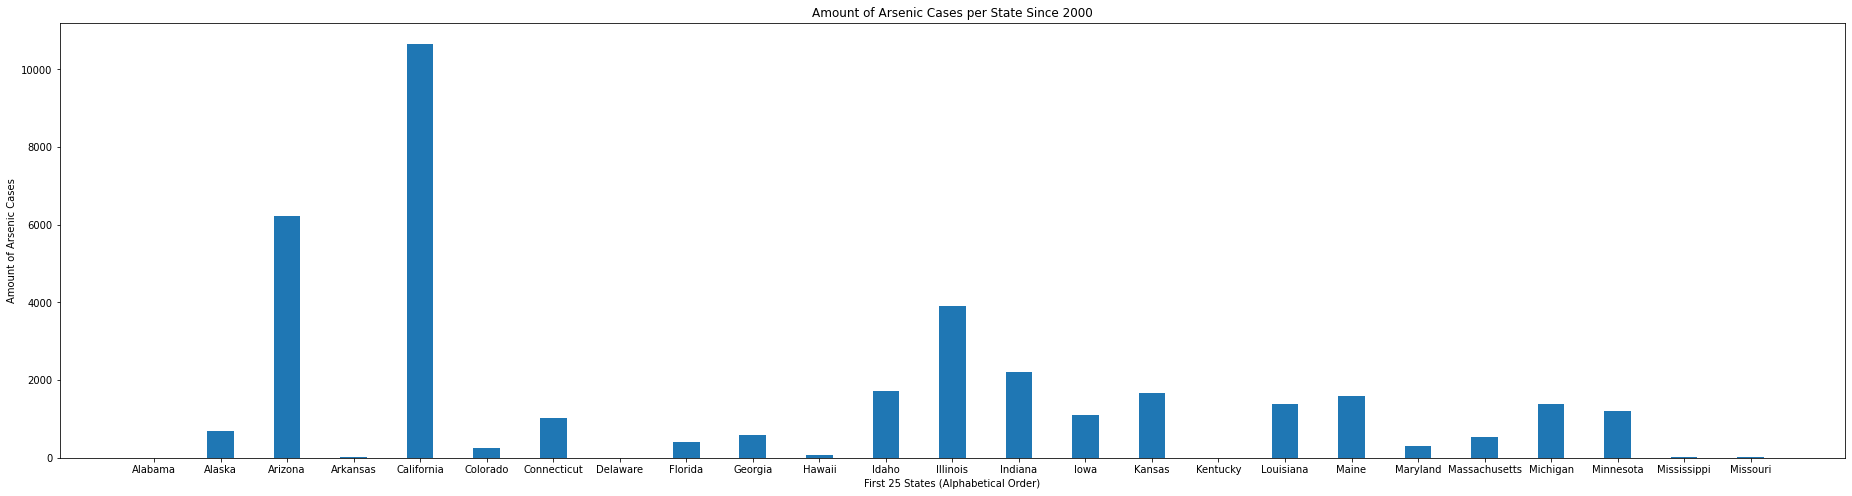

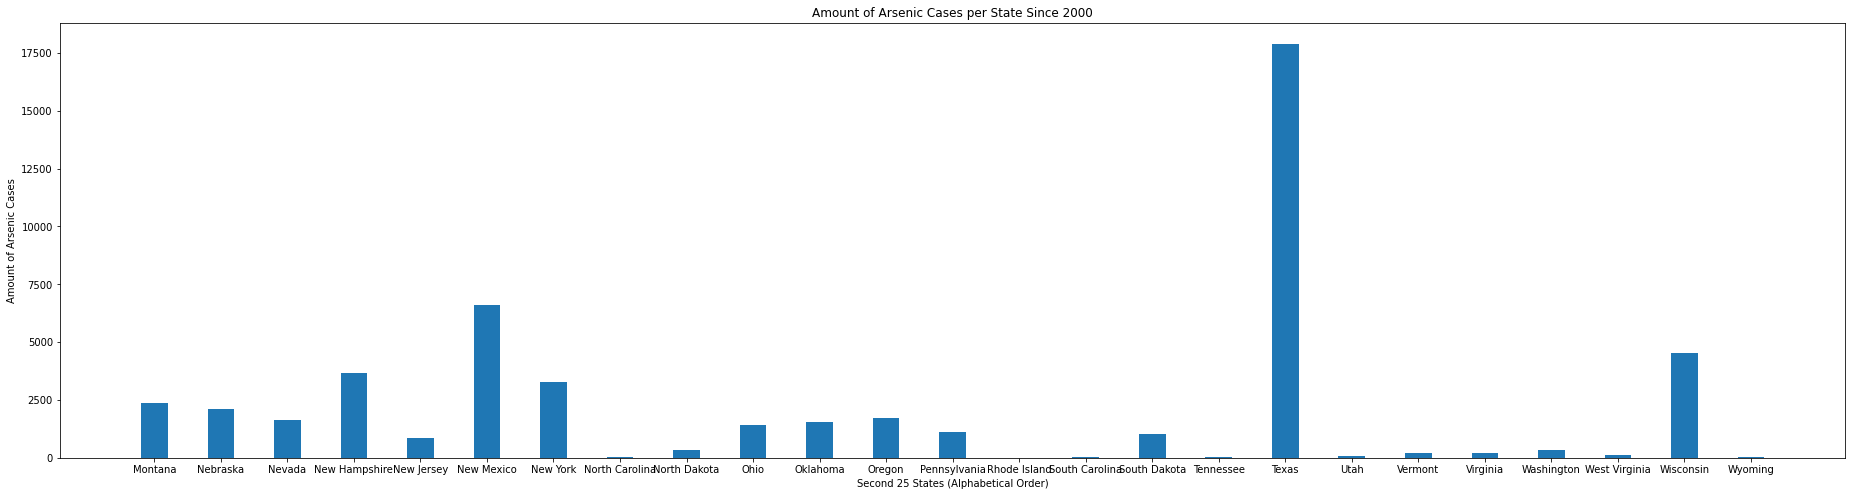

In [90]:
state_keys = list(all_states_dict.keys())
arsenic_cases_values = list(all_states_dict.values())
state_keys_first_half = state_keys[0:25]
state_keys_second_half = state_keys[25:50]
arsenic_cases_values_first_half = arsenic_cases_values[0:25]
arsenic_cases_values_second_half = arsenic_cases_values[25:50]

fig = plt.figure(figsize = (32, 8))

plt.bar(state_keys_first_half, arsenic_cases_values_first_half, align='center', width=0.4)
plt.title('Amount of Arsenic Cases per State Since 2000')
plt.xlabel('First 25 States (Alphabetical Order)')
plt.ylabel('Amount of Arsenic Cases')
plt.show()

fig = plt.figure(figsize = (32, 8))

plt.bar(state_keys_second_half, arsenic_cases_values_second_half, align='center', width=0.4)
plt.title('Amount of Arsenic Cases per State Since 2000')
plt.xlabel('Second 25 States (Alphabetical Order)')
plt.ylabel('Amount of Arsenic Cases')
plt.show()

In [ ]:
#Finding total number of cases across the nation
total = 0
for key in all_states_dict:
    total += all_states_dict[key]
print("The total number of cases across the nation over the past two decades (earliest case dating back to 2000): " + str(total))

import numpy as np
import matplotlib.pyplot as plt

all_states_minus_arizona = total - all_states_dict["Arizona"]
arizona = all_states_dict["Arizona"]
y = np.array([all_states_minus_arizona, arizona])
my_labels = ["The Rest of the United States", "Arizona"]
myexplode = [0, 0.3]

plt.pie(y, labels = my_labels, textprops={'color':"w"})
plt.show()

plt.pie(y, labels = my_labels, textprops={'color':"w"}, explode = myexplode)
plt.show()

In [80]:
number_one = ""
number_two = ""
number_three = ""
number_four = ""
number_five = ""

top_amount = 0
second_top_amount = 0
third_top_amount = 0
fourth_top_amount = 0
fifth_top_amount = 0

for key in all_states_dict:
    if all_states_dict[key] > top_amount:
        number_five = number_four
        fifth_top_amount = fourth_top_amount
        number_four = number_three
        fourth_top_amount = third_top_amount
        number_three = number_two
        third_top_amount = second_top_amount
        number_two = number_one
        second_top_amount = top_amount

        number_one = key
        top_amount = all_states_dict[key]
        #print("Number One " + number_one)
    elif all_states_dict[key] > second_top_amount:
        number_five = number_four
        fifth_top_amount = fourth_top_amount
        number_four = number_three
        fourth_top_amount = third_top_amount
        number_three = number_two
        third_top_amount = second_top_amount

        number_two = key
        second_top_amount = all_states_dict[key]
        #print("Number Two " + number_two)
    elif all_states_dict[key] > third_top_amount:
        number_five = number_four
        fifth_top_amount = fourth_top_amount
        number_four = number_three
        fourth_top_amount = third_top_amount

        number_three = key
        third_top_amount = all_states_dict[key]
        #print("Number Three " + number_three)
    elif all_states_dict[key] > fourth_top_amount:
        number_five = number_four
        fifth_top_amount = fourth_top_amount

        number_four = key
        fourth_top_amount = all_states_dict[key]
        #print("Number Four " + number_five)
    elif all_states_dict[key] > fifth_top_amount:
        number_five = key
        fifth_top_amount = all_states_dict[key]
        #print("Number Five " + number_five)
    else:
        continue

print(number_one)
print(number_two)
print(number_three)
print(number_four)
print(number_five) 

print(str(top_amount))
print(str(second_top_amount))
print(str(third_top_amount))
print(str(fourth_top_amount))
print(str(fifth_top_amount))

Number One Alaska
Number One Arizona
Number Three Arkansas
Number One California
Number Four Arkansas
Number Three Connecticut
Number Five Florida
Number Five Georgia
Number Three Idaho
Number Three Illinois
Number Four Idaho
Number Four Indiana
Number Four Montana
Number Two New Mexico
Number One Texas
Number Five Wisconsin
Texas
California
New Mexico
Arizona
Wisconsin
17903
10664
6600
6217
4524


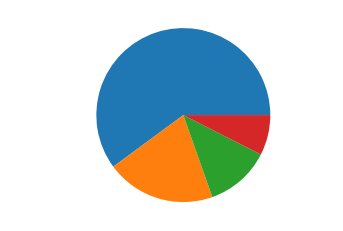

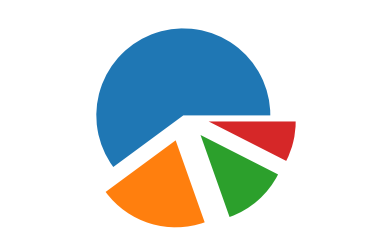

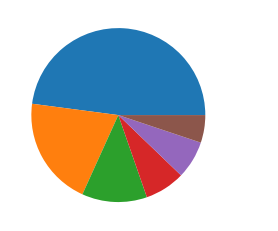

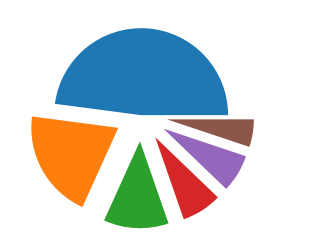

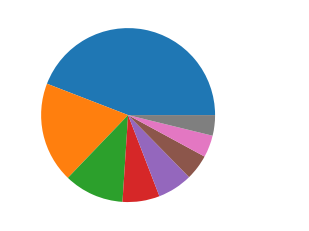

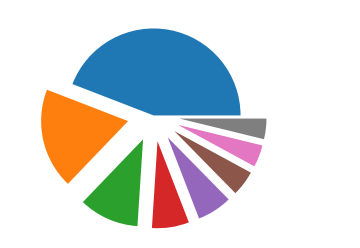

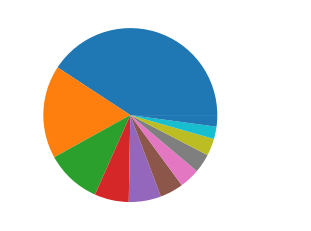

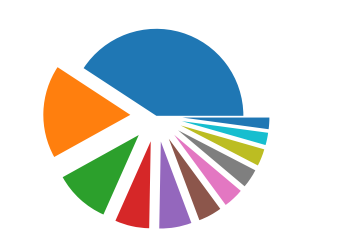

In [82]:
texas = all_states_dict["Texas"]
california = all_states_dict["California"]
new_mexico = all_states_dict["New Mexico"]
wisconsin = all_states_dict["Wisconsin"]
illinois = all_states_dict["Illinois"]
new_hampshire = all_states_dict["New Hampshire"]
new_york = all_states_dict["New York"]
montana = all_states_dict["Montana"]
indiana = all_states_dict["Indiana"]

all_states_minus_top_three = total - california - new_mexico - texas
all_states_minus_top_five = total - california - arizona - texas - wisconsin - new_mexico
all_states_minus_top_seven = total - california - arizona - texas - wisconsin - new_mexico - illinois - new_hampshire
all_states_minus_top_ten = total - california - arizona - texas - wisconsin - new_mexico - illinois - new_hampshire - new_york - montana - indiana

a = np.array([all_states_minus_top_three, texas, california, new_mexico])
new_labels = ["The Rest of the United States", "Texas", "California", "New Mexico"]
myexplode = [0, 0.3, 0.3, 0.3]

plt.pie(a, labels = new_labels, textprops={'color':"w"})
plt.show()

plt.pie(a, labels = new_labels, textprops={'color':"w"}, explode = myexplode)
plt.show()

b = np.array([all_states_minus_top_five, texas, california, new_mexico, arizona, wisconsin])
new_labels_two = ["The Rest of the United States", "Texas", "California", "New Mexico", "Arizona", "Wisconsin"]
myexplodeTwo = [0, 0.3, 0.3, 0.3, 0.3, 0.3]

plt.pie(b, labels = new_labels_two, textprops={'color':"w"})
plt.show()

plt.pie(b, labels = new_labels_two, textprops={'color':"w"}, explode = myexplodeTwo)
plt.show()

c = np.array([all_states_minus_top_five, texas, california, new_mexico, arizona, wisconsin, illinois, new_hampshire])
new_labels_three = ["The Rest of the United States", "Texas", "California", "New Mexico", "Arizona", "Wisconsin", "Illinois", "New Hampshire"]
myexplodeThree = [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]

plt.pie(c, labels = new_labels_three, textprops={'color':"w"})
plt.show()

plt.pie(c, labels = new_labels_three, textprops={'color':"w"}, explode = myexplodeThree)
plt.show()

d = np.array([all_states_minus_top_five, texas, california, new_mexico, arizona, wisconsin, illinois, new_hampshire, new_york, montana, indiana])
new_labels_four = ["The Rest of the United States", "Texas", "California", "New Mexico", "Arizona", "Wisconsin", "Illinois", "New Hampshire", "New York", "Montana", "Indiana"]
myexplodeFour = [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]

plt.pie(d, labels = new_labels_four, textprops={'color':"w"})
plt.show()

plt.pie(d, labels = new_labels_four, textprops={'color':"w"}, explode = myexplodeFour)
plt.show()
